In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

from pathlib import Path

DATA_PATH = Path("openscreen.csv")
assert DATA_PATH.exists(), f"Couldn't find {DATA_PATH.resolve()}"

# 1) Get column names from the header only (fast)
header_df = pd.read_csv(DATA_PATH, nrows=0)
cols = header_df.columns.str.strip().tolist()
n_cols = len(cols)

# 2) Count rows in chunks (robust and low-memory)
row_count = 0
for chunk in pd.read_csv(DATA_PATH, chunksize=100_000):
    row_count += len(chunk)

# 3) Print summary + column names
print(f"Rows: {row_count}")
print(f"Columns: {n_cols}\n")

print("Variable names:")
for c in cols:
    print(c)

Rows: 42847
Columns: 2993

Variable names:
Metadata_Well
Metadata_Object_Count
Nuc_AreaShape_Area
Nuc_AreaShape_BoundingBoxArea
Nuc_AreaShape_BoundingBoxMaximum_X
Nuc_AreaShape_BoundingBoxMaximum_Y
Nuc_AreaShape_BoundingBoxMinimum_X
Nuc_AreaShape_BoundingBoxMinimum_Y
Nuc_AreaShape_Center_X
Nuc_AreaShape_Center_Y
Nuc_AreaShape_Compactness
Nuc_AreaShape_Eccentricity
Nuc_AreaShape_EquivalentDiameter
Nuc_AreaShape_EulerNumber
Nuc_AreaShape_Extent
Nuc_AreaShape_FormFactor
Nuc_AreaShape_MajorAxisLength
Nuc_AreaShape_MaxFeretDiameter
Nuc_AreaShape_MaximumRadius
Nuc_AreaShape_MeanRadius
Nuc_AreaShape_MedianRadius
Nuc_AreaShape_MinFeretDiameter
Nuc_AreaShape_MinorAxisLength
Nuc_AreaShape_Orientation
Nuc_AreaShape_Perimeter
Nuc_AreaShape_Solidity
Nuc_AreaShape_Zernike_0_0
Nuc_AreaShape_Zernike_1_1
Nuc_AreaShape_Zernike_2_0
Nuc_AreaShape_Zernike_2_2
Nuc_AreaShape_Zernike_3_1
Nuc_AreaShape_Zernike_3_3
Nuc_AreaShape_Zernike_4_0
Nuc_AreaShape_Zernike_4_2
Nuc_AreaShape_Zernike_4_4
Nuc_AreaShape_Zerni

In [63]:
cols = [
    "Metadata_Well",
    "Metadata_Object_Count",
    "Metadata_Celltype",
    "Metadata_Site",
    "Metadata_Replicate",
    "Metadata_Plate_num",
    "Metadata_Unique_plate",
    "Metadata_EOS",
    "Metadata_Concentration",
    "Metadata_Partner",
    "Metadata_Row",
    "Metadata_Col",
    "Metadata_Compound_type",
    "Metadata_DMSO",
    "Metadata_Nocodazole",
    "Metadata_Tetrandrine",
]

df_small = pd.read_csv("openscreen.csv", usecols=cols, low_memory=False)
print(f"Subset shape: {df_small.shape[0]} rows x {df_small.shape[1]} columns")
df_small.head()

Subset shape: 42847 rows x 16 columns


,Metadata_Well,Metadata_Object_Count,Metadata_Celltype,Metadata_Site,Metadata_Replicate,Metadata_Plate_num,Metadata_Unique_plate,Metadata_EOS,Metadata_Concentration,Metadata_Partner,Metadata_Row,Metadata_Col,Metadata_Compound_type,Metadata_DMSO,Metadata_Nocodazole,Metadata_Tetrandrine
0,A01,700,HepG,FMP,R1,B1001,HepG_FMP_B1001_R1,EOS100001,10,Bioactives,A,1,EOS,False,False,False
1,A02,890,HepG,FMP,R1,B1001,HepG_FMP_B1001_R1,EOS100089,10,Bioactives,A,2,EOS,False,False,False
2,A03,742,HepG,FMP,R1,B1001,HepG_FMP_B1001_R1,EOS100009,10,Bioactives,A,3,EOS,False,False,False
3,A04,840,HepG,FMP,R1,B1001,HepG_FMP_B1001_R1,EOS100097,10,Bioactives,A,4,EOS,False,False,False
4,A05,91,HepG,FMP,R1,B1001,HepG_FMP_B1001_R1,EOS100017,10,Bioactives,A,5,EOS,False,False,False


In [84]:
df_small[df_small["Metadata_DMSO"] == True]["Metadata_Row"].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P'], dtype=object)

In [65]:
df_small[(df_small["Metadata_DMSO"] == True)]

,Metadata_Well,Metadata_Object_Count,Metadata_Celltype,Metadata_Site,Metadata_Replicate,Metadata_Plate_num,Metadata_Unique_plate,Metadata_EOS,Metadata_Concentration,Metadata_Partner,Metadata_Row,Metadata_Col,Metadata_Compound_type,Metadata_DMSO,Metadata_Nocodazole,Metadata_Tetrandrine
21,A23,874,HepG,FMP,R1,B1001,HepG_FMP_B1001_R1,DMSO,0,Bioactives,A,23,DMSO,True,False,False
22,A24,804,HepG,FMP,R1,B1001,HepG_FMP_B1001_R1,DMSO,0,Bioactives,A,24,DMSO,True,False,False
45,B23,818,HepG,FMP,R1,B1001,HepG_FMP_B1001_R1,DMSO,0,Bioactives,B,23,DMSO,True,False,False
46,B24,796,HepG,FMP,R1,B1001,HepG_FMP_B1001_R1,DMSO,0,Bioactives,B,24,DMSO,True,False,False
69,C23,1019,HepG,FMP,R1,B1001,HepG_FMP_B1001_R1,DMSO,0,Bioactives,C,23,DMSO,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42752,L24,468,HepG,USC,R2,B1007,HepG_USC_B1007_R2,DMSO,0,Bioactives,L,24,DMSO,True,False,False
42775,M23,1098,HepG,USC,R2,B1007,HepG_USC_B1007_R2,DMSO,0,Bioactives,M,23,DMSO,True,False,False
42776,M24,1100,HepG,USC,R2,B1007,HepG_USC_B1007_R2,DMSO,0,Bioactives,M,24,DMSO,True,False,False
42799,N23,912,HepG,USC,R2,B1007,HepG_USC_B1007_R2,DMSO,0,Bioactives,N,23,DMSO,True,False,False


In [ ]:
from typing import Optional, Tuple, Sequence
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap


def _row_to_idx(r):
    if isinstance(r, str) and len(r) >= 1 and r[0].isalpha():
        return ord(r[0].upper()) - ord('A') + 1
    try:
        return int(r)
    except Exception:
        return np.nan

def _col_to_idx(c):
    try:
        return int(c)
    except Exception:
        return np.nan

def _auto_prepare(df: pd.DataFrame) -> pd.DataFrame:
    """Create the convenience columns expected by the plotting code if missing."""
    d = df.copy()

    if "UniquePlate" not in d.columns:
        if "Metadata_Unique_plate" in d.columns:
            d["UniquePlate"] = d["Metadata_Unique_plate"].astype(str)
        elif "Metadata_Plate_num" in d.columns:
            d["UniquePlate"] = d["Metadata_Plate_num"].astype(str)
        else:
            d["UniquePlate"] = "PLATE_1"

    if "Lab" not in d.columns:
        if "Metadata_Site" in d.columns:
            d["Lab"] = d["Metadata_Site"].astype(str)
        else:
            d["Lab"] = "LAB"

    if "Rep" not in d.columns:
        if "Metadata_Replicate" in d.columns:
            d["Rep"] = d["Metadata_Replicate"].astype(str)
        else:
            d["Rep"] = "1"

    need_row = "RowIdx" not in d.columns
    need_col = "ColIdx" not in d.columns
    if need_row or need_col:
        if "Metadata_Row" in d.columns:
            d["RowIdx"] = d["Metadata_Row"].apply(_row_to_idx).astype("Int64")
        if "Metadata_Col" in d.columns:
            d["ColIdx"] = d["Metadata_Col"].apply(_col_to_idx).astype("Int64")
        if ("RowIdx" not in d.columns or d["RowIdx"].isna().all() or
            "ColIdx" not in d.columns or d["ColIdx"].isna().all()):
            if "Metadata_Well" in d.columns:
                rc = d["Metadata_Well"].astype(str).str.extract(r"^([A-Za-z]+)(\d+)$")
                if "RowIdx" not in d.columns or d["RowIdx"].isna().all():
                    d["RowIdx"] = rc[0].apply(_row_to_idx).astype("Int64")
                if "ColIdx" not in d.columns or d["ColIdx"].isna().all():
                    d["ColIdx"] = rc[1].apply(_col_to_idx).astype("Int64")

    if "Metadata_DMSO" in d.columns:
        d["Metadata_DMSO"] = pd.to_numeric(d["Metadata_DMSO"], errors="coerce").fillna(0).astype(int)
    else:
        d["Metadata_DMSO"] = 0

    return d


def _ensure_ax(ax=None, figsize=(10, 6)) -> Tuple[plt.Figure, plt.Axes, bool]:
    if ax is None:
        fig = plt.figure(figsize=figsize)
        ax = plt.gca()
        created = True
    else:
        fig = ax.figure
        created = False
    return fig, ax, created

def _apply_normalize(g: pd.DataFrame, value_col: str, normalize: Optional[str]) -> np.ndarray:
    x = g[value_col].to_numpy(dtype=float)
    if normalize is None:
        return x

    if normalize == "plate":
        med = np.nanmedian(x)
        return x / med if med and not np.isnan(med) else x

    if normalize == "row":
        out = np.empty_like(x, dtype=float)
        for row in g["RowIdx"].unique():
            idx = (g["RowIdx"] == row).to_numpy()
            med = np.nanmedian(x[idx])
            out[idx] = x[idx] / med if med and not np.isnan(med) else x[idx]
        return out

    if normalize == "lab":
        if "Lab" not in g.columns:
            return x
        out = np.empty_like(x, dtype=float)
        for lab in g["Lab"].unique():
            idx = (g["Lab"] == lab).to_numpy()
            med = np.nanmedian(x[idx])
            out[idx] = x[idx] / med if med and not np.isnan(med) else x[idx]
        return out

    if normalize == "dmso":
        mask = (g.get("Metadata_DMSO", 0) == 1).to_numpy()
        dmso_med = np.nanmedian(x[mask]) if mask.any() else np.nan
        return x / dmso_med if dmso_med and not np.isnan(dmso_med) else x

    return x

def _imshow_plate(ax: plt.Axes, mat: np.ndarray, title: str, nrow=16, ncol=24,
                  *, cmap=None, norm: Optional[Normalize]=None):
    im = ax.imshow(mat, aspect="auto", cmap=cmap, norm=norm, interpolation="nearest")
    ax.set_xlabel(f"Column (1–{ncol})")
    ax.set_ylabel(f"Row (A–{chr(ord('A') + nrow - 1)})")
    ax.set_yticks(range(nrow)); ax.set_yticklabels([chr(ord('A') + i) for i in range(nrow)])
    xticks = [0, max(0, ncol//4 - 1), max(0, ncol//2 - 1), max(0, 3*ncol//4 - 1), ncol - 1]
    xticks = sorted(set(xticks)); ax.set_xticks(xticks); ax.set_xticklabels([t+1 for t in xticks])
    ax.set_title(title)
    return im

def _rdylgn_with_nan_blue():
    cmap = plt.cm.RdYlGn_r.copy()
    cmap.set_bad("blue")
    return cmap


def _yellow_purple_with_nan_gray():
    """
    Purple (low) → Yellow (high), NaN as light gray.
    Uses matplotlib's 'plasma' which naturally goes purple→yellow.
    """
    cmap = plt.cm.plasma.copy()
    cmap.set_bad("#D9D9D9") 
    return cmap

def _vmin_vmax_from_stack(stack: pd.DataFrame) -> Tuple[float, float]:
    vals = pd.to_numeric(stack["_value_"], errors="coerce").to_numpy()
    vmin = np.nanmin(vals) if np.isfinite(vals).any() else 0.0
    vmax = np.nanmax(vals) if np.isfinite(vals).any() else 1.0
    if not np.isfinite(vmin) or not np.isfinite(vmax) or vmin == vmax:
        vmin, vmax = 0.0, 1.0
    return float(vmin), float(vmax)

def _mean_matrix_from_stack(stack: pd.DataFrame, nrow=16, ncol=24) -> np.ndarray:
    mat = np.full((nrow, ncol), np.nan)
    mean_by_rc = stack.groupby(["RowIdx", "ColIdx"])["_value_"].mean().reset_index()
    for _, r in mean_by_rc.iterrows():
        i, j = int(r["RowIdx"]) - 1, int(r["ColIdx"]) - 1
        if 0 <= i < nrow and 0 <= j < ncol:
            mat[i, j] = r["_value_"]
    return mat


def plot_superplate_average_heatmap(
    df: pd.DataFrame,
    value_col: str = "Metadata_Object_Count",
    *,
    normalize: Optional[str] = "dmso",
    nrow: int = 16,
    ncol: int = 24,
    ax: Optional[plt.Axes] = None,
    display_fig: bool = True,
    color_scale: str = "figure",  
    vmin_glob: Optional[float] = None,
    vmax_glob: Optional[float] = None,
) -> Tuple[plt.Figure, plt.Axes]:
    d = _auto_prepare(df)

    frames = []
    for _, g in d.groupby("UniquePlate"):
        required = {"RowIdx", "ColIdx", value_col}
        if not required.issubset(g.columns):
            continue
        vals = _apply_normalize(g, value_col, normalize)
        frames.append(pd.DataFrame({
            "RowIdx": g["RowIdx"].values,
            "ColIdx": g["ColIdx"].values,
            "_value_": vals
        }))

    fig, ax, _ = _ensure_ax(ax, figsize=(10, 6))
    if not frames:
        ax.text(0.5, 0.5, "No data to average", ha="center", va="center", transform=ax.transAxes)
        fig.tight_layout()
        if display_fig: display(fig)
        return fig, ax

    stack = pd.concat(frames, ignore_index=True)
    mat = _mean_matrix_from_stack(stack, nrow=nrow, ncol=ncol)

    cmap = _yellow_purple_with_nan_gray()
    if color_scale == "figure":
        vmin, vmax = _vmin_vmax_from_stack(stack)
    else:
        vmin = vmin_glob if vmin_glob is not None else np.nanmin(mat)
        vmax = vmax_glob if vmax_glob is not None else np.nanmax(mat)
        if not np.isfinite(vmin) or not np.isfinite(vmax) or vmin == vmax:
            vmin, vmax = 0.0, 1.0
    norm = Normalize(vmin=vmin, vmax=vmax)

    norm_tag = f" • norm={normalize}" if normalize else ""
    im = _imshow_plate(ax, mat, f"Superplate average • {value_col}{norm_tag}",
                       nrow=nrow, ncol=ncol, cmap=cmap, norm=norm)
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label(value_col)
    fig.text(0.995, 0.02, "Gray = no data", ha="right", va="center", fontsize=9)

    fig.tight_layout()
    if display_fig: display(fig)
    return fig, ax

def plot_lab_superplate_grid(
    df: pd.DataFrame,
    labs: Optional[Sequence[str]] = None,
    value_col: str = "Metadata_Object_Count",
    *,
    normalize: Optional[str] = "dmso",
    nrow: int = 16,
    ncol: int = 24,
    ncols: int = 3,
    figsize_per_panel: Tuple[float, float] = (5.0, 4.0),
    display_fig: bool = True,
    color_scale: str = "figure",
    vmin_glob: Optional[float] = None,
    vmax_glob: Optional[float] = None,
) -> Tuple[plt.Figure, np.ndarray]:
    d = _auto_prepare(df)
    labs_all = sorted(d["Lab"].astype(str).unique())
    labs = labs_all if labs is None else [l for l in labs if l in labs_all]

    if len(labs) == 0:
        fig = plt.figure(figsize=(6, 4)); ax = plt.gca()
        ax.text(0.5, 0.5, "No labs to display", ha="center", va="center", transform=ax.transAxes)
        fig.tight_layout()
        if display_fig: display(fig)
        return fig, np.array([ax])

    n = len(labs); ncols = max(1, ncols); nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(nrows, ncols,
                             figsize=(figsize_per_panel[0]*ncols, figsize_per_panel[1]*nrows),
                             sharex=True, sharey=True)
    axes = np.atleast_2d(axes)
    cmap = _yellow_purple_with_nan_gray()

    if color_scale == "global":
        all_frames = []
        for lab in labs:
            g = d[d["Lab"] == lab]
            for _, gg in g.groupby("UniquePlate"):
                if {"RowIdx","ColIdx",value_col}.issubset(gg.columns):
                    vals = _apply_normalize(gg, value_col, normalize)
                    all_frames.append(pd.DataFrame({"RowIdx": gg["RowIdx"].values,
                                                    "ColIdx": gg["ColIdx"].values,
                                                    "_value_": vals}))
        if all_frames:
            big_stack = pd.concat(all_frames, ignore_index=True)
            vmin, vmax = _vmin_vmax_from_stack(big_stack)
        else:
            vmin, vmax = 0.0, 1.0
        norm_global = Normalize(vmin=vmin_glob if vmin_glob is not None else vmin,
                                vmax=vmax_glob if vmax_glob is not None else vmax)
    else:
        norm_global = None

    for idx, lab in enumerate(labs):
        r, c = divmod(idx, ncols); ax = axes[r, c]
        g = d[d["Lab"] == lab]

        frames = []
        for _, gg in g.groupby("UniquePlate"):
            if {"RowIdx","ColIdx",value_col}.issubset(gg.columns):
                vals = _apply_normalize(gg, value_col, normalize)
                frames.append(pd.DataFrame({"RowIdx": gg["RowIdx"].values,
                                            "ColIdx": gg["ColIdx"].values,
                                            "_value_": vals}))
        if frames:
            stack = pd.concat(frames, ignore_index=True)
            mat = _mean_matrix_from_stack(stack, nrow=nrow, ncol=ncol)
            if norm_global is None:
                vmin, vmax = _vmin_vmax_from_stack(stack)
                norm = Normalize(vmin=vmin, vmax=vmax)
            else:
                norm = norm_global
            im = _imshow_plate(ax, mat, f"Lab {lab}", nrow=nrow, ncol=ncol, cmap=cmap, norm=norm)
            fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04).set_label(value_col)
        else:
            ax.text(0.5, 0.5, f"No data for Lab {lab}", ha="center", va="center", transform=ax.transAxes)

    for j in range(n, nrows*ncols):
        r, c = divmod(j, ncols); axes[r, c].axis("off")

    fig.suptitle(f"Superplate averages by Lab • {value_col} • norm={normalize}", y=0.995, fontsize=12)
    fig.text(0.995, 0.02, "Gray = no data", ha="right", va="center", fontsize=9)
    fig.tight_layout()
    if display_fig: display(fig)
    return fig, axes

def plot_labrep_superplate_grid(
    df: pd.DataFrame,
    labs: Optional[Sequence[str]] = None,
    reps: Optional[Sequence[str]] = None,
    value_col: str = "Metadata_Object_Count",
    *,
    normalize: Optional[str] = "dmso",
    nrow: int = 16,
    ncol: int = 24,
    ncols: int = 4,
    figsize_per_panel: Tuple[float, float] = (4.5, 4.0),
    display_fig: bool = True,
    color_scale: str = "figure",   # 'figure' | 'global'
    vmin_glob: Optional[float] = None,
    vmax_glob: Optional[float] = None,
) -> Tuple[plt.Figure, np.ndarray]:
    d = _auto_prepare(df)
    labs_all = sorted(d["Lab"].astype(str).unique())
    reps_all = sorted(d["Rep"].astype(str).unique())
    labs = labs_all if labs is None else [l for l in labs if l in labs_all]
    reps = reps_all if reps is None else [r for r in reps if r in reps_all]

    combos = [(l, r) for l in labs for r in reps]
    if len(combos) == 0:
        fig = plt.figure(figsize=(6, 4)); ax = plt.gca()
        ax.text(0.5, 0.5, "No (Lab, Rep) combos to display", ha="center", va="center", transform=ax.transAxes)
        fig.tight_layout()
        if display_fig: display(fig)
        return fig, np.array([ax])

    n = len(combos); ncols = max(1, ncols); nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(nrows, ncols,
                             figsize=(figsize_per_panel[0]*ncols, figsize_per_panel[1]*nrows),
                             sharex=True, sharey=True)
    axes = np.atleast_2d(axes)
    cmap = _yellow_purple_with_nan_gray()

    if color_scale == "global":
        all_frames = []
        for lab, rep in combos:
            g = d[(d["Lab"] == lab) & (d["Rep"] == rep)]
            for _, gg in g.groupby("UniquePlate"):
                if {"RowIdx","ColIdx",value_col}.issubset(gg.columns):
                    vals = _apply_normalize(gg, value_col, normalize)
                    all_frames.append(pd.DataFrame({"RowIdx": gg["RowIdx"].values,
                                                    "ColIdx": gg["ColIdx"].values,
                                                    "_value_": vals}))
        if all_frames:
            big_stack = pd.concat(all_frames, ignore_index=True)
            vmin, vmax = _vmin_vmax_from_stack(big_stack)
        else:
            vmin, vmax = 0.0, 1.0
        norm_global = Normalize(vmin=vmin_glob if vmin_glob is not None else vmin,
                                vmax=vmax_glob if vmax_glob is not None else vmax)
    else:
        norm_global = None

    for idx, (lab, rep) in enumerate(combos):
        r, c = divmod(idx, ncols); ax = axes[r, c]
        g = d[(d["Lab"] == lab) & (d["Rep"] == rep)]

        frames = []
        for _, gg in g.groupby("UniquePlate"):
            if {"RowIdx","ColIdx",value_col}.issubset(gg.columns):
                vals = _apply_normalize(gg, value_col, normalize)
                frames.append(pd.DataFrame({"RowIdx": gg["RowIdx"].values,
                                            "ColIdx": gg["ColIdx"].values,
                                            "_value_": vals}))
        if frames:
            stack = pd.concat(frames, ignore_index=True)
            mat = _mean_matrix_from_stack(stack, nrow=nrow, ncol=ncol)
            if norm_global is None:
                vmin, vmax = _vmin_vmax_from_stack(stack)
                norm = Normalize(vmin=vmin, vmax=vmax)
            else:
                norm = norm_global
            im = _imshow_plate(ax, mat, f"{lab} • Rep {rep}", nrow=nrow, ncol=ncol, cmap=cmap, norm=norm)
            fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04).set_label(value_col)
        else:
            ax.text(0.5, 0.5, f"No data for {lab}, Rep {rep}", ha="center", va="center", transform=ax.transAxes)

    for j in range(n, nrows*ncols):
        r, c = divmod(j, ncols); axes[r, c].axis("off")

    fig.suptitle(f"Superplate averages by (Lab, Rep) • {value_col} • norm={normalize}", y=0.995, fontsize=12)
    fig.text(0.995, 0.02, "Gray = no data", ha="right", va="center", fontsize=9)
    fig.tight_layout()
    if display_fig: display(fig)
    return fig, axes
from matplotlib.colors import Normalize

def plot_lab_avg_over_reps(
    df: pd.DataFrame,
    labs: Optional[Sequence[str]] = None,
    value_col: str = "Metadata_Object_Count",
    *,
    normalize: Optional[str] = "dmso",
    nrow: int = 16,
    ncol: int = 24,
    ncols: int = 3,
    figsize_per_panel: Tuple[float, float] = (5.0, 4.0),
    display_fig: bool = True,
    color_scale: str = "figure",   
    vmin_glob: Optional[float] = None,
    vmax_glob: Optional[float] = None,
) -> Tuple[plt.Figure, np.ndarray]:
    """
    For each Lab:
      1) Within each plate, average value_col across the 4 replicates per well (RowIdx, ColIdx).
      2) Then average those per-plate means across plates (equal weight per plate).
    Result: one heatmap per Lab showing mean across 4 reps (and plates) for that Lab.
    """
    d = _auto_prepare(df)
    labs_all = sorted(d["Lab"].astype(str).unique())
    labs = labs_all if labs is None else [l for l in labs if l in labs_all]

    if len(labs) == 0:
        fig = plt.figure(figsize=(6, 4)); ax = plt.gca()
        ax.text(0.5, 0.5, "No labs to display", ha="center", va="center", transform=ax.transAxes)
        fig.tight_layout()
        if display_fig: display(fig)
        return fig, np.array([ax])

    n = len(labs); ncols = max(1, ncols); nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(nrows, ncols,
                             figsize=(figsize_per_panel[0]*ncols, figsize_per_panel[1]*nrows),
                             sharex=True, sharey=True)
    axes = np.atleast_2d(axes)
    cmap = _yellow_purple_with_nan_gray()

    norm_global = None
    if color_scale == "global":
        all_lab_final = []
        for lab in labs:
            g_lab = d[d["Lab"] == lab]
            per_plate_means = []
            for _, gg in g_lab.groupby("UniquePlate"):
                if {"RowIdx","ColIdx",value_col}.issubset(gg.columns):
                    vals = _apply_normalize(gg, value_col, normalize)
                    df_plate = pd.DataFrame({
                        "RowIdx": gg["RowIdx"].values,
                        "ColIdx": gg["ColIdx"].values,
                        "_value_": vals
                    })
                    df_plate = (df_plate
                                .groupby(["RowIdx","ColIdx"], as_index=False)["_value_"]
                                .mean())
                    per_plate_means.append(df_plate)
            if per_plate_means:
                lab_stack = pd.concat(per_plate_means, ignore_index=True)
                all_lab_final.append(lab_stack)
        if all_lab_final:
            big_stack = pd.concat(all_lab_final, ignore_index=True)
            vmin, vmax = _vmin_vmax_from_stack(big_stack)
        else:
            vmin, vmax = 0.0, 1.0
        norm_global = Normalize(vmin=vmin_glob if vmin_glob is not None else vmin,
                                vmax=vmax_glob if vmax_glob is not None else vmax)

    for idx, lab in enumerate(labs):
        r, c = divmod(idx, ncols); ax = axes[r, c]
        g_lab = d[d["Lab"] == lab]

        per_plate_means = []
        for _, gg in g_lab.groupby("UniquePlate"):
            if {"RowIdx","ColIdx",value_col}.issubset(gg.columns):
                vals = _apply_normalize(gg, value_col, normalize)
                df_plate = pd.DataFrame({
                    "RowIdx": gg["RowIdx"].values,
                    "ColIdx": gg["ColIdx"].values,
                    "_value_": vals
                })
                df_plate = (df_plate
                            .groupby(["RowIdx","ColIdx"], as_index=False)["_value_"]
                            .mean())
                per_plate_means.append(df_plate)

        if per_plate_means:
            lab_stack = pd.concat(per_plate_means, ignore_index=True)
            lab_avg = (lab_stack
                       .groupby(["RowIdx","ColIdx"], as_index=False)["_value_"]
                       .mean())
            mat = _mean_matrix_from_stack(lab_avg, nrow=nrow, ncol=ncol)

            if norm_global is None:
                vmin, vmax = _vmin_vmax_from_stack(lab_avg)
                norm = Normalize(vmin=vmin, vmax=vmax)
            else:
                norm = norm_global

            im = _imshow_plate(ax, mat, f"Lab {lab} • avg of 4 reps",
                               nrow=nrow, ncol=ncol, cmap=cmap, norm=norm)
            fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04).set_label(value_col)
        else:
            ax.text(0.5, 0.5, f"No data for Lab {lab}", ha="center", va="center", transform=ax.transAxes)

    # hide extras
    for j in range(n, nrows*ncols):
        r, c = divmod(j, ncols); axes[r, c].axis("off")

    fig.suptitle(f"Per-Lab averages across 4 replicates • {value_col} • norm={normalize}", y=0.995, fontsize=12)
    fig.text(0.995, 0.02, "Gray = no data", ha="right", va="center", fontsize=9)
    fig.tight_layout()
    if display_fig: display(fig)
    return fig, axes

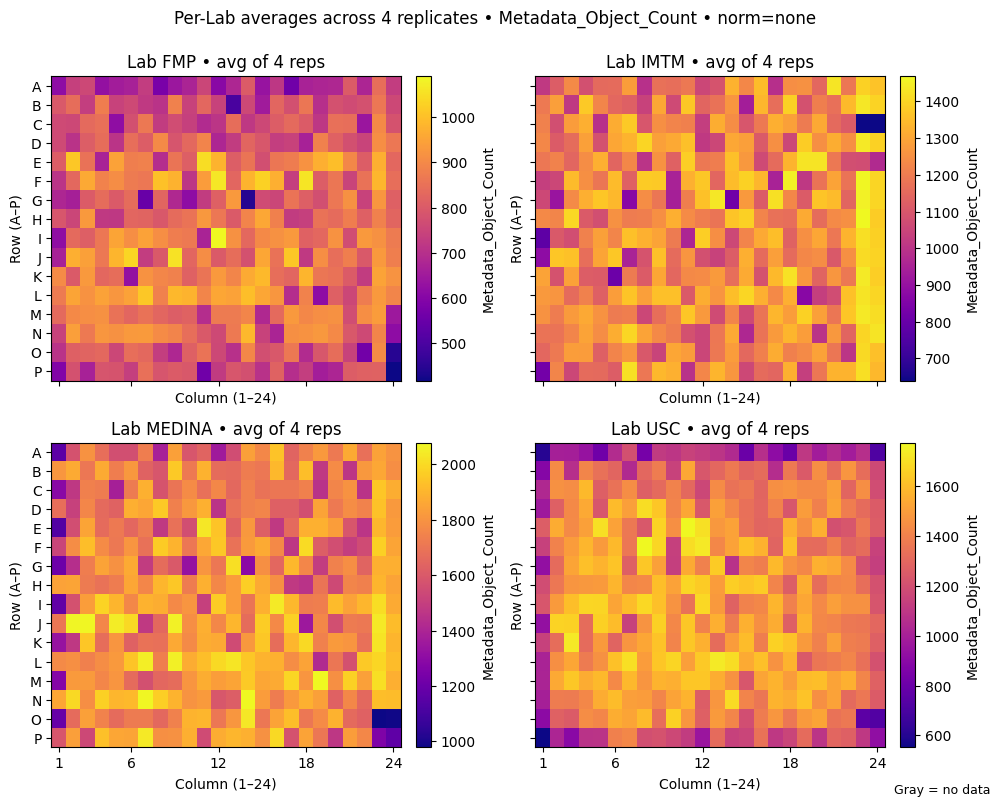

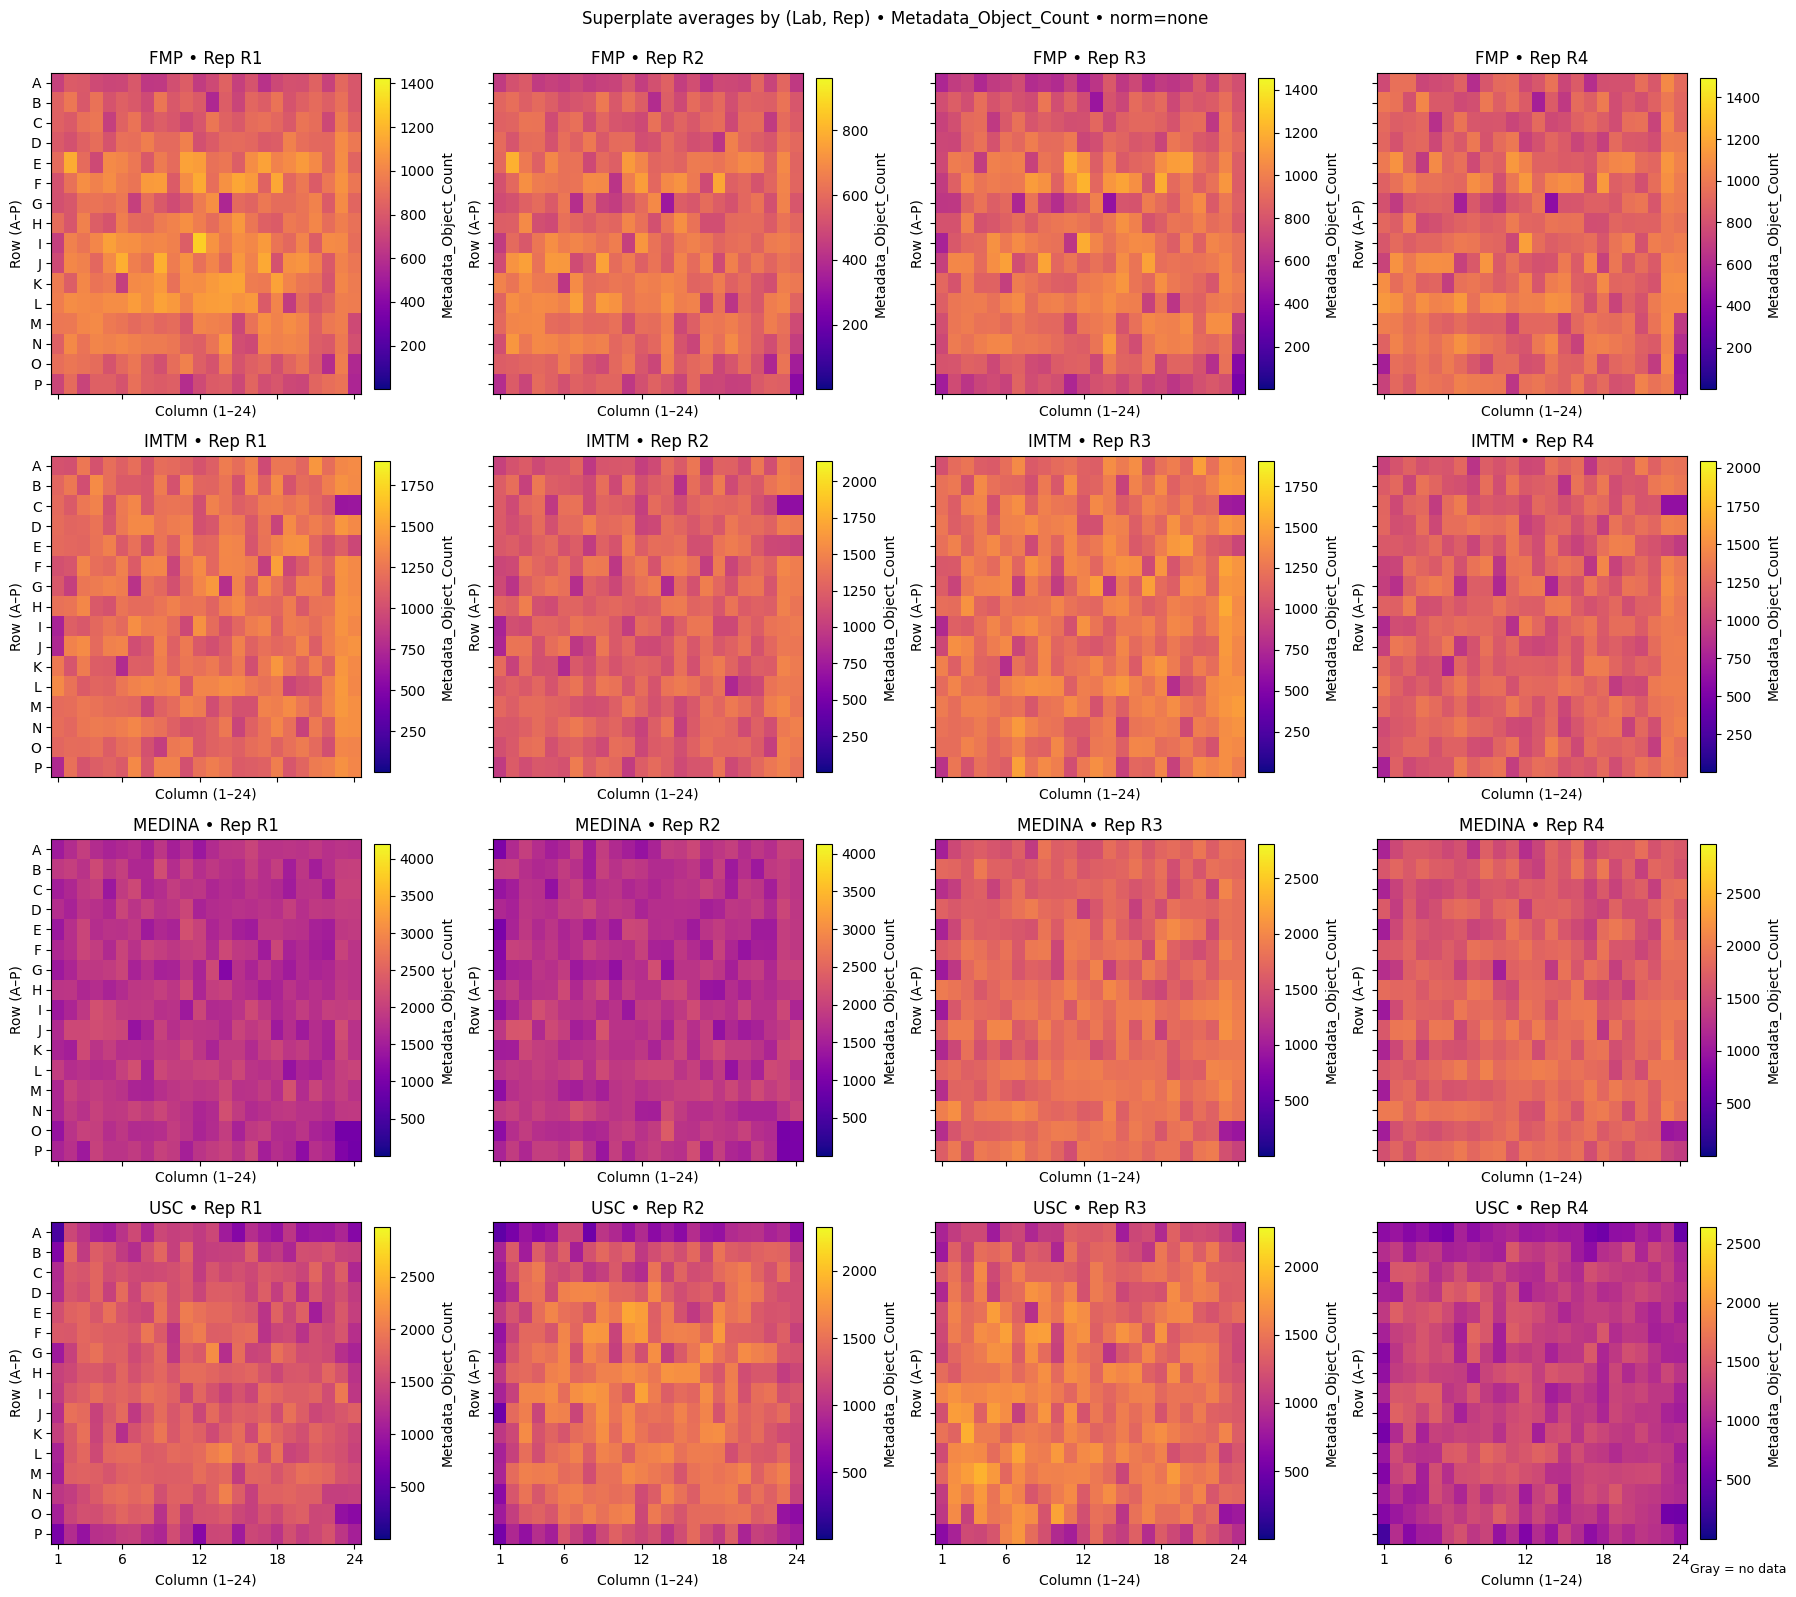

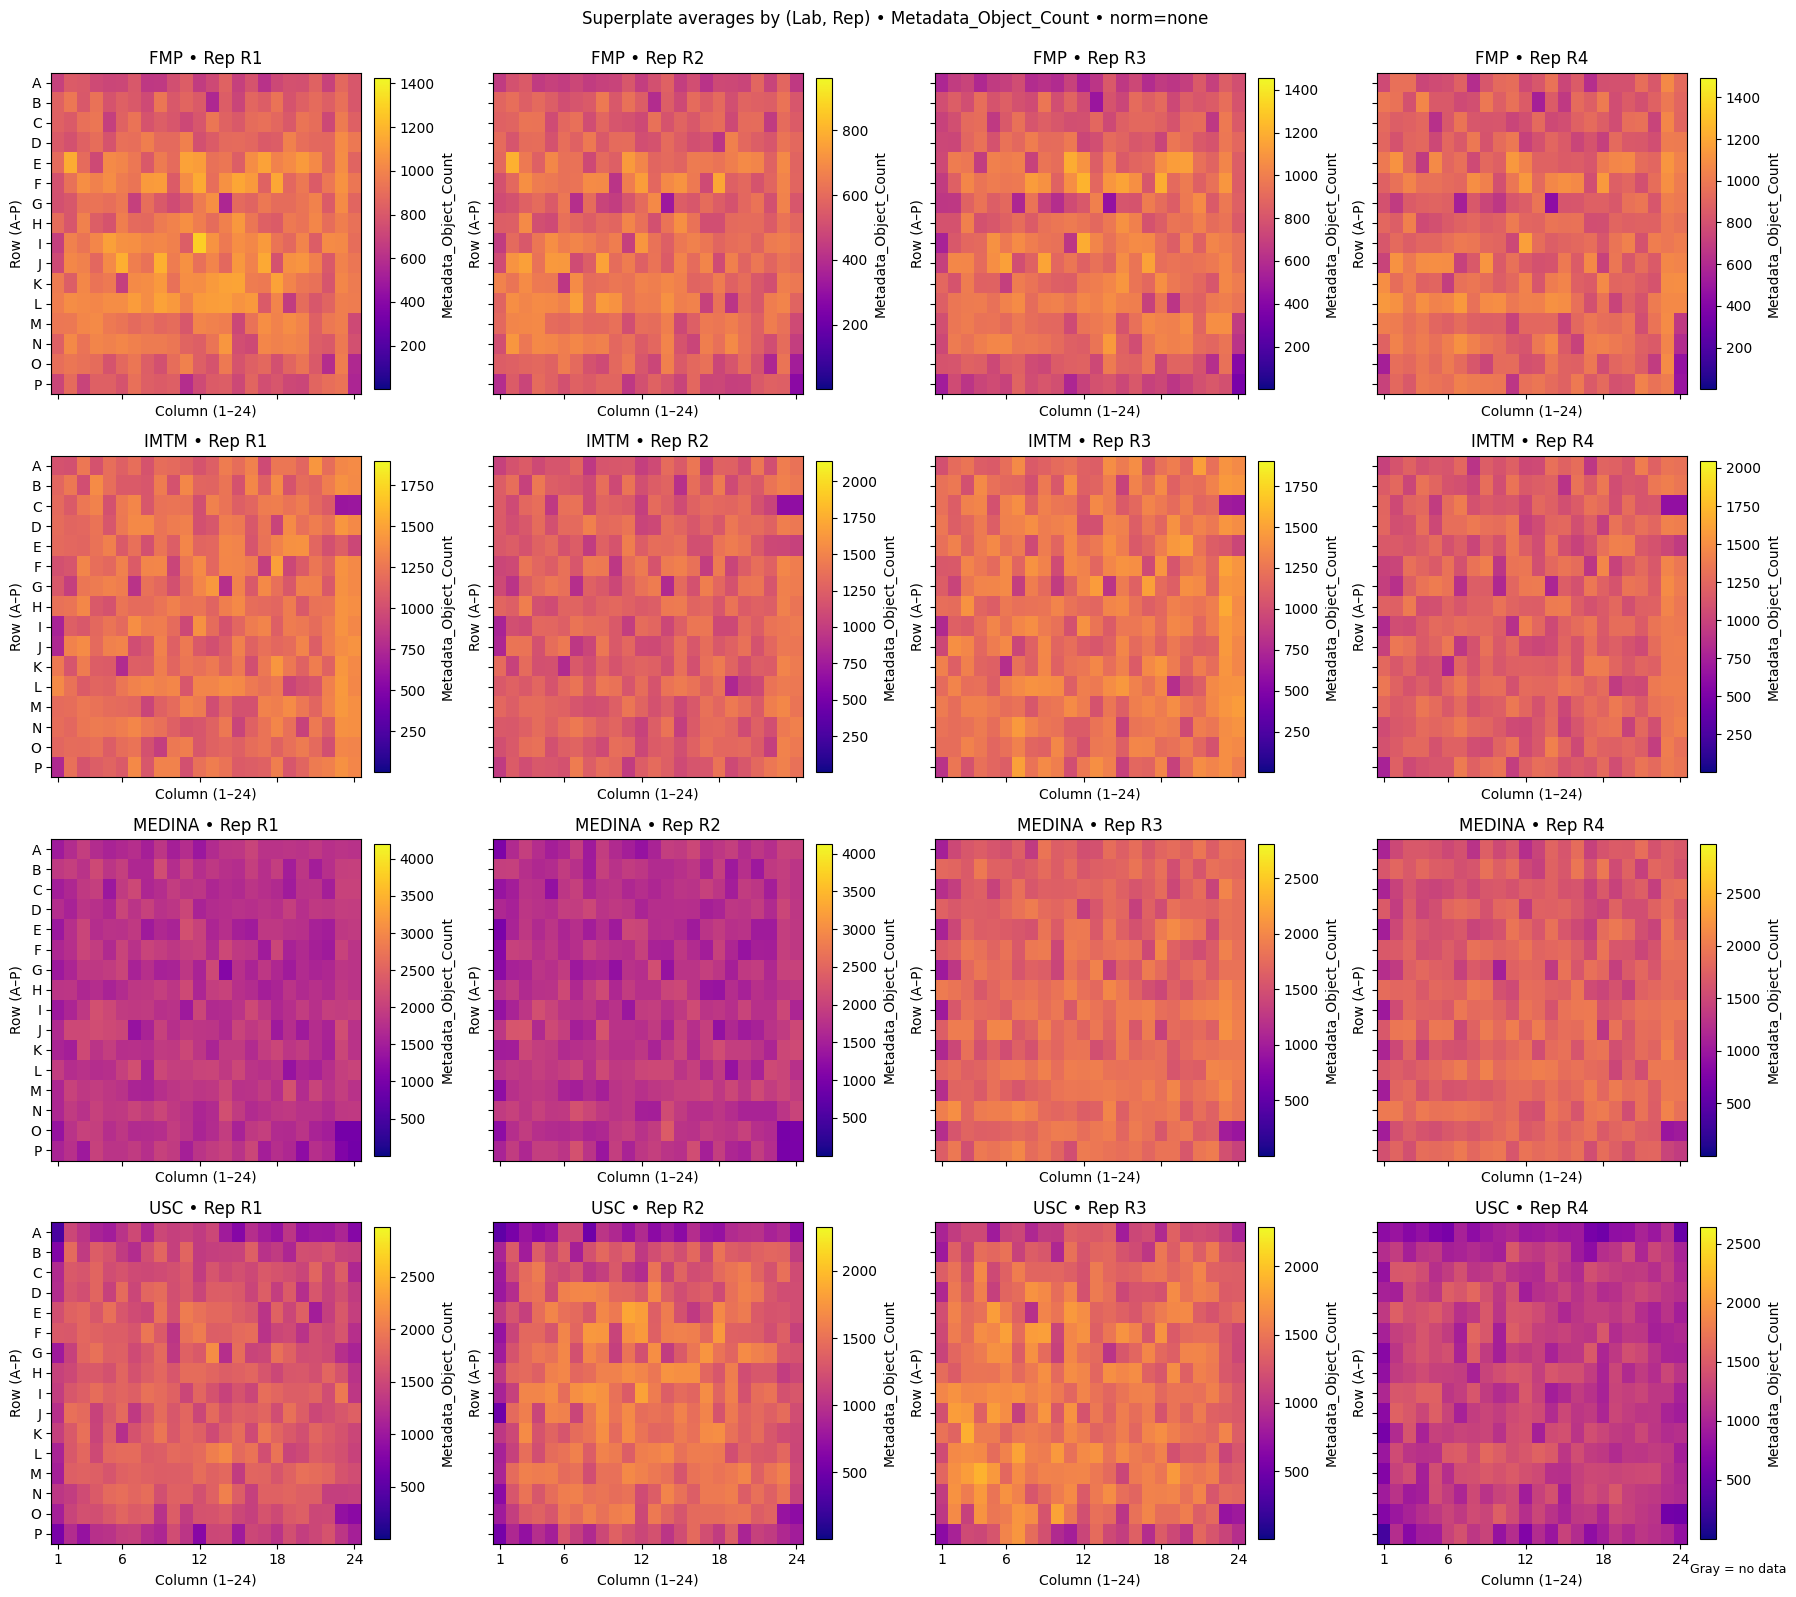

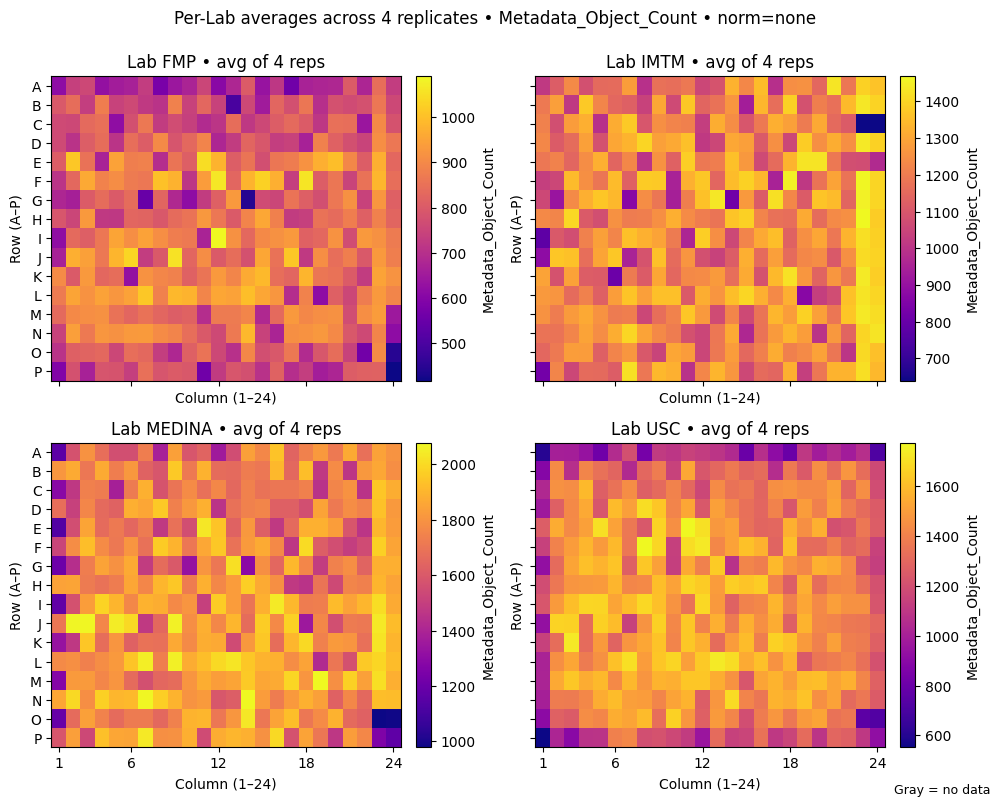

In [ ]:

fig, axes = plot_labrep_superplate_grid(df_small, value_col="Metadata_Object_Count", normalize="none", ncols=4, display_fig=False)
fig, axes = plot_labrep_superplate_grid(df_small, value_col="Metadata_Object_Count", normalize="none", ncols=4, display_fig=False)

fig, axes = plot_lab_avg_over_reps(
    df_small,
    labs=["FMP", "IMTM", "MEDINA", "USC"],
    value_col="Metadata_Object_Count",
    normalize="none",
    nrow=16, ncol=24,
    ncols=2,
    color_scale="figure"
)
plt.show()

In [71]:
# Visualizing Column Effects on DMSO Controls
# Let's focus on DMSO controls and see how cell count varies by column

import seaborn as sns

# Filter for DMSO controls only
dmso_data = df_small[df_small["Metadata_DMSO"] == True].copy()

print(f"DMSO control wells: {len(dmso_data)}")
print(f"Unique plates: {dmso_data['Metadata_Unique_plate'].nunique()}")
print(f"Unique columns represented: {sorted(dmso_data['Metadata_Col'].unique())}")

DMSO control wells: 3136
Unique plates: 112
Unique columns represented: [np.int64(23), np.int64(24)]


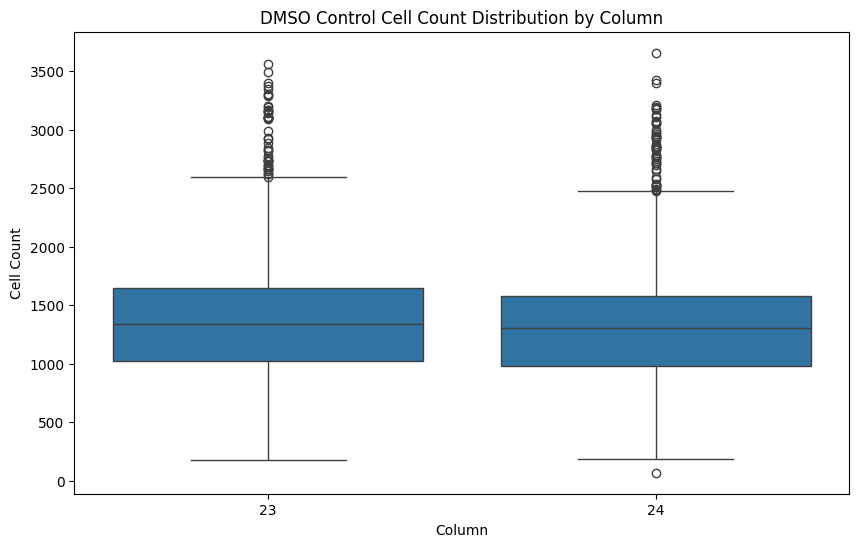


Statistical Comparison (t-test):
Column 23 mean: 1388.0 ± 524.7
Column 24 mean: 1336.5 ± 515.8
T-statistic: 2.768
P-value: 5.68e-03


In [73]:
# 1. Box Plot: Cell Count Distribution by Column for DMSO Controls
plt.figure(figsize=(10, 6))
sns.boxplot(data=dmso_data, x='Metadata_Col', y='Metadata_Object_Count')
plt.title('DMSO Control Cell Count Distribution by Column')
plt.xlabel('Column')
plt.ylabel('Cell Count')
plt.show()

# Add statistical test
from scipy import stats
col23_counts = dmso_data[dmso_data['Metadata_Col'] == 23]['Metadata_Object_Count']
col24_counts = dmso_data[dmso_data['Metadata_Col'] == 24]['Metadata_Object_Count']

# Perform t-test
t_stat, p_value = stats.ttest_ind(col23_counts.dropna(), col24_counts.dropna())
print(f"\nStatistical Comparison (t-test):")
print(f"Column 23 mean: {col23_counts.mean():.1f} ± {col23_counts.std():.1f}")
print(f"Column 24 mean: {col24_counts.mean():.1f} ± {col24_counts.std():.1f}")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.2e}")
if p_value < 0.001:
    print("*** Highly significant difference between columns")

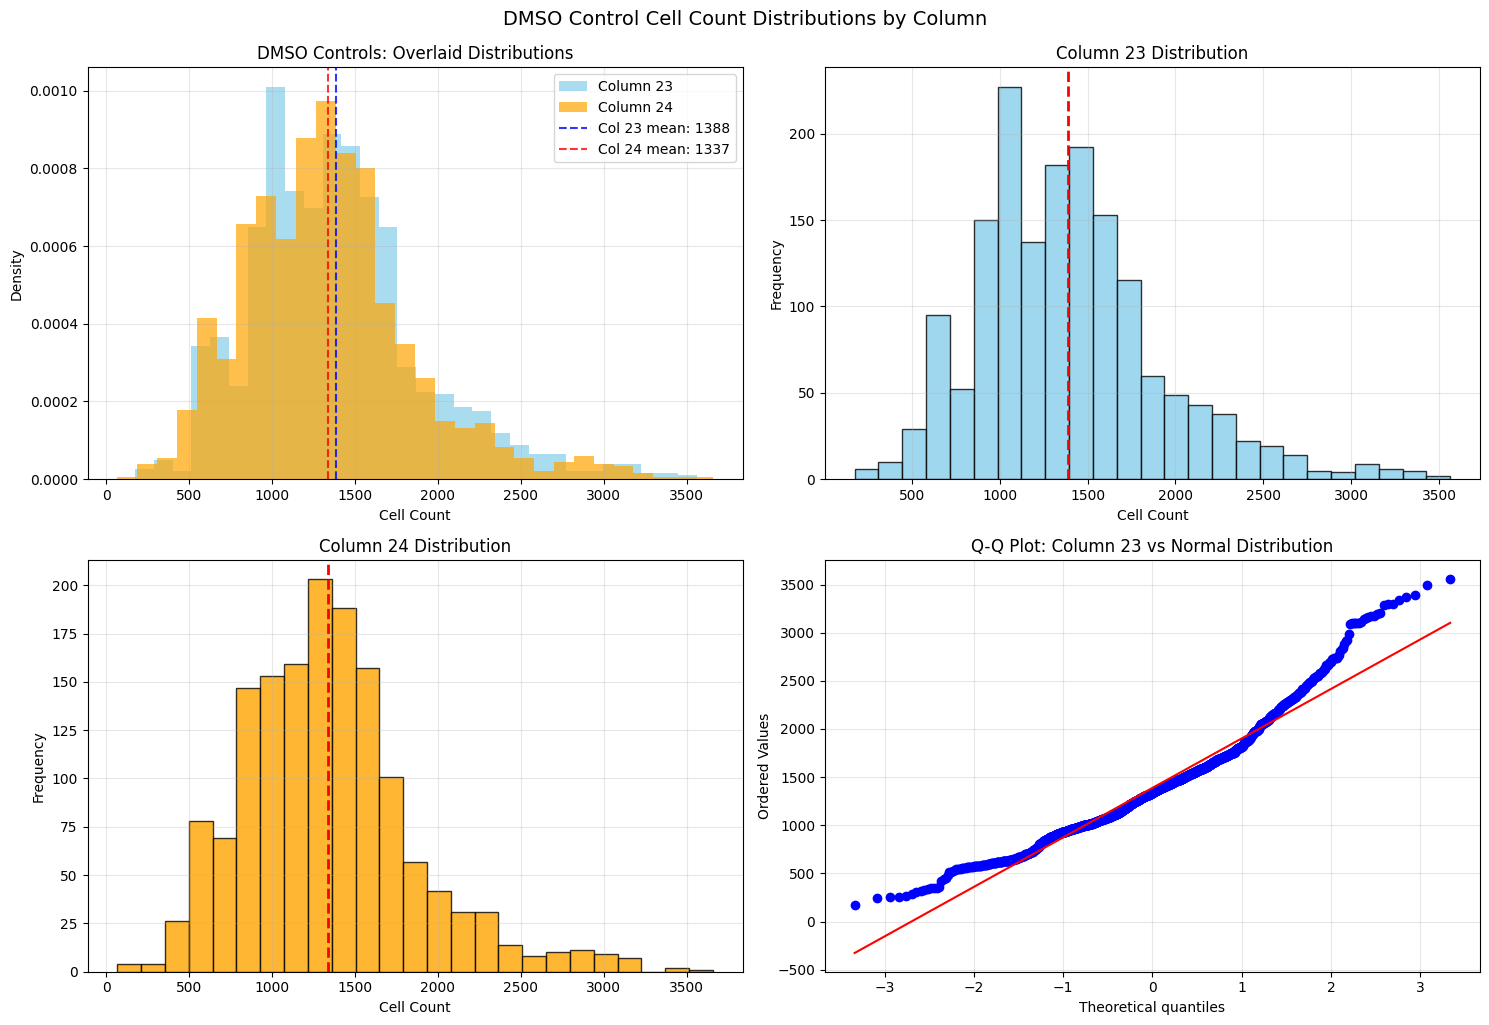

Distribution Statistics:
Column 23:
  Mean: 1388.0
  Median: 1338.0
  Std Dev: 524.7
  Skewness: 0.888
  Kurtosis: 1.326

Column 24:
  Mean: 1336.5
  Median: 1301.5
  Std Dev: 515.8
  Skewness: 0.881
  Kurtosis: 1.512

Normality Tests (Shapiro-Wilk):
Column 23 p-value: 1.51e-21
Column 24 p-value: 1.95e-20
Note: Low p-values suggest non-normal distribution


In [80]:
# 1b. Histogram Comparisons: Distribution Shapes by Column
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Subplot 1: Overlaid histograms
axes[0,0].hist(col23_counts.dropna(), bins=30, alpha=0.7, label='Column 23', color='skyblue', density=True)
axes[0,0].hist(col24_counts.dropna(), bins=30, alpha=0.7, label='Column 24', color='orange', density=True)
axes[0,0].axvline(col23_counts.mean(), color='blue', linestyle='--', alpha=0.8, label=f'Col 23 mean: {col23_counts.mean():.0f}')
axes[0,0].axvline(col24_counts.mean(), color='red', linestyle='--', alpha=0.8, label=f'Col 24 mean: {col24_counts.mean():.0f}')
axes[0,0].set_xlabel('Cell Count')
axes[0,0].set_ylabel('Density')
axes[0,0].set_title('DMSO Controls: Overlaid Distributions')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Subplot 2: Side-by-side histograms
axes[0,1].hist(col23_counts.dropna(), bins=25, alpha=0.8, color='skyblue', edgecolor='black')
axes[0,1].set_xlabel('Cell Count')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Column 23 Distribution')
axes[0,1].axvline(col23_counts.mean(), color='red', linestyle='--', linewidth=2)
axes[0,1].grid(True, alpha=0.3)

axes[1,0].hist(col24_counts.dropna(), bins=25, alpha=0.8, color='orange', edgecolor='black')
axes[1,0].set_xlabel('Cell Count')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Column 24 Distribution')
axes[1,0].axvline(col24_counts.mean(), color='red', linestyle='--', linewidth=2)
axes[1,0].grid(True, alpha=0.3)

# Subplot 4: Q-Q plot for normality check
from scipy import stats as scipy_stats
import scipy.stats

# Q-Q plots to check normality assumption for t-test
scipy_stats.probplot(col23_counts.dropna(), dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot: Column 23 vs Normal Distribution')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('DMSO Control Cell Count Distributions by Column', y=1.02, fontsize=14)
plt.show()

# Additional statistics
print("Distribution Statistics:")
print("="*50)
print(f"Column 23:")
print(f"  Mean: {col23_counts.mean():.1f}")
print(f"  Median: {col23_counts.median():.1f}")
print(f"  Std Dev: {col23_counts.std():.1f}")
print(f"  Skewness: {scipy_stats.skew(col23_counts.dropna()):.3f}")
print(f"  Kurtosis: {scipy_stats.kurtosis(col23_counts.dropna()):.3f}")

print(f"\nColumn 24:")
print(f"  Mean: {col24_counts.mean():.1f}")
print(f"  Median: {col24_counts.median():.1f}")
print(f"  Std Dev: {col24_counts.std():.1f}")
print(f"  Skewness: {scipy_stats.skew(col24_counts.dropna()):.3f}")
print(f"  Kurtosis: {scipy_stats.kurtosis(col24_counts.dropna()):.3f}")

# Normality tests
shapiro_23 = scipy_stats.shapiro(col23_counts.dropna().sample(min(5000, len(col23_counts))))
shapiro_24 = scipy_stats.shapiro(col24_counts.dropna().sample(min(5000, len(col24_counts))))

print(f"\nNormality Tests (Shapiro-Wilk):")
print(f"Column 23 p-value: {shapiro_23.pvalue:.2e}")
print(f"Column 24 p-value: {shapiro_24.pvalue:.2e}")
print("Note: Low p-values suggest non-normal distribution")

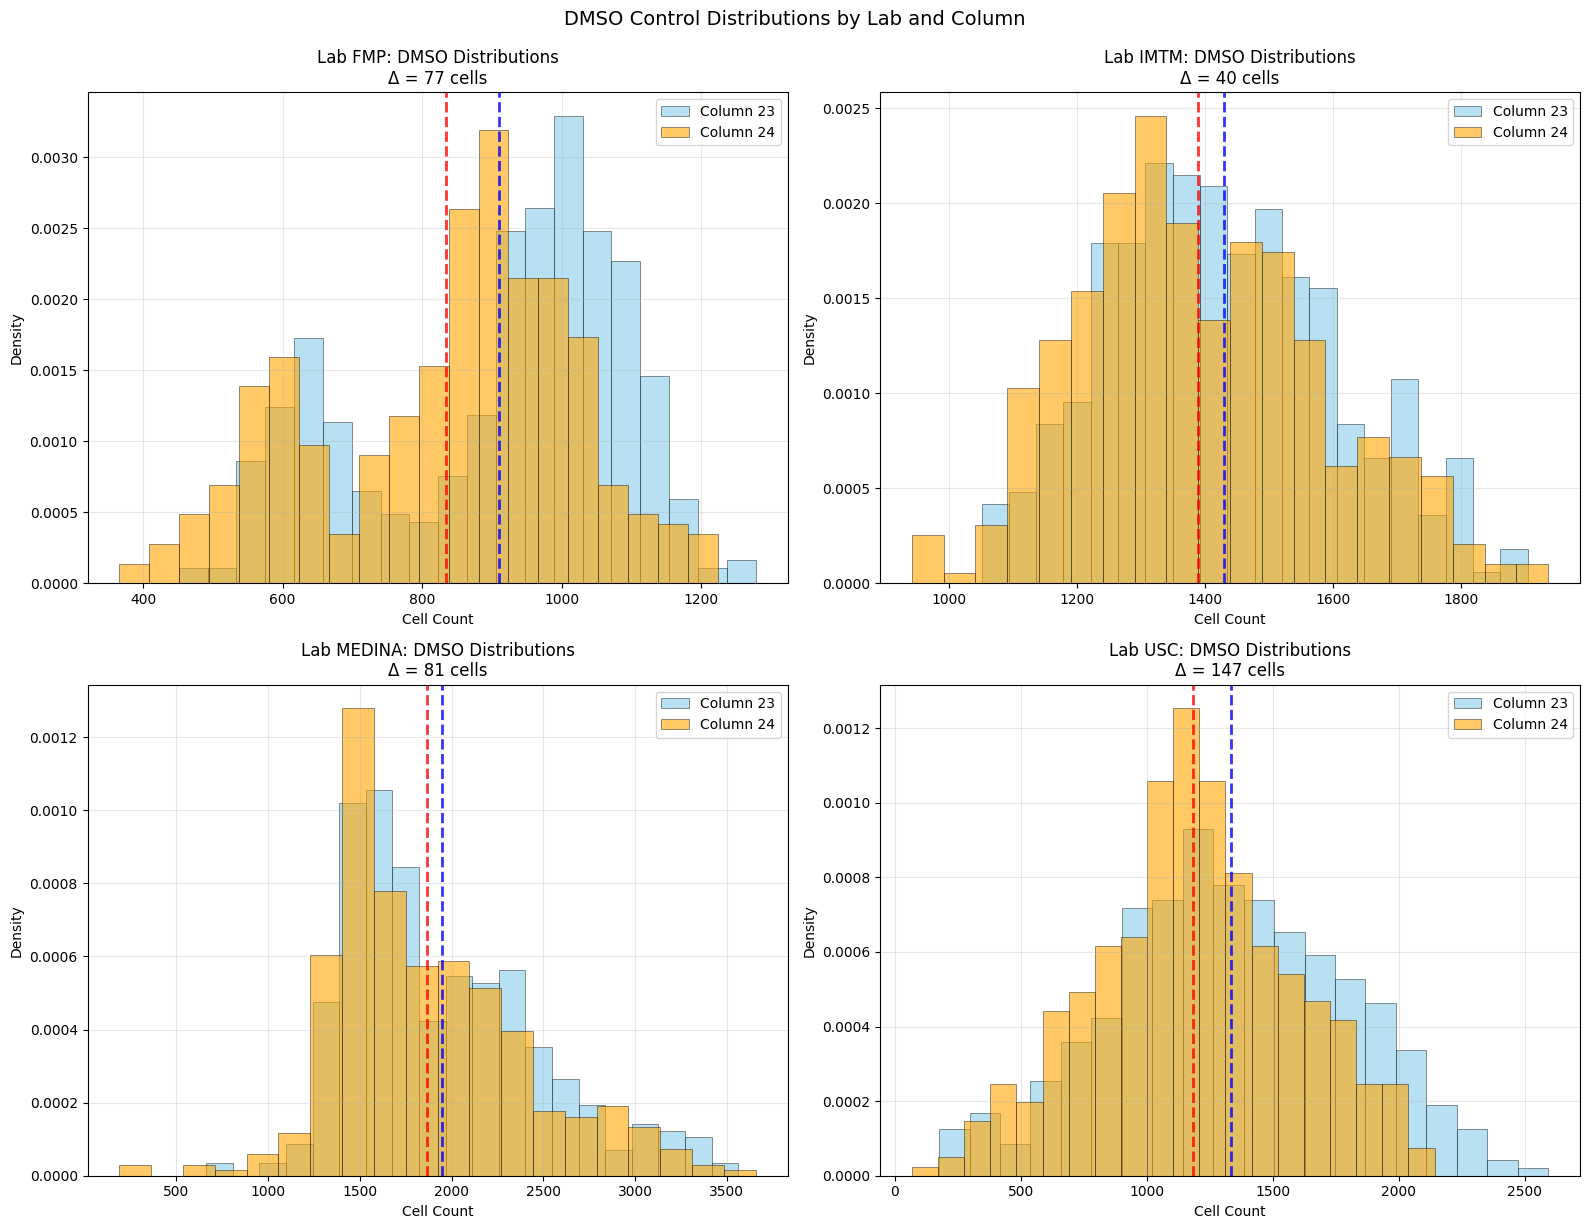

Percentile Analysis:
Column 23 percentiles:
  10th percentile:    777
  25th percentile:   1019
  50th percentile:   1338
  75th percentile:   1649
  90th percentile:   2080
  95th percentile:   2374
  99th percentile:   3104

Column 24 percentiles:
  10th percentile:    734
  25th percentile:    976
  50th percentile:   1302
  75th percentile:   1576
  90th percentile:   1970
  95th percentile:   2291
  99th percentile:   2976

Percentile differences (Col 23 - Col 24):
  10th percentile:    +43
  25th percentile:    +43
  50th percentile:    +36
  75th percentile:    +73
  90th percentile:   +110
  95th percentile:    +82
  99th percentile:   +128

Distribution Overlap Analysis:
Column 23 range: 176 to 3562
Column 24 range: 68 to 3657
Overlap range: 176 to 3562
Col 23 values in overlap: 100.0%
Col 24 values in overlap: 99.9%


In [81]:
# 1c. Histogram Analysis by Lab
labs = sorted(dmso_data['Metadata_Site'].unique())
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, lab in enumerate(labs):
    if i < len(axes):
        lab_data = dmso_data[dmso_data['Metadata_Site'] == lab]
        col23_lab = lab_data[lab_data['Metadata_Col'] == 23]['Metadata_Object_Count']
        col24_lab = lab_data[lab_data['Metadata_Col'] == 24]['Metadata_Object_Count']
        
        if len(col23_lab) > 0 and len(col24_lab) > 0:
            axes[i].hist(col23_lab.dropna(), bins=20, alpha=0.6, label='Column 23', 
                        color='skyblue', density=True, edgecolor='black', linewidth=0.5)
            axes[i].hist(col24_lab.dropna(), bins=20, alpha=0.6, label='Column 24', 
                        color='orange', density=True, edgecolor='black', linewidth=0.5)
            
            # Add mean lines
            axes[i].axvline(col23_lab.mean(), color='blue', linestyle='--', alpha=0.8, linewidth=2)
            axes[i].axvline(col24_lab.mean(), color='red', linestyle='--', alpha=0.8, linewidth=2)
            
            # Calculate difference
            diff = col23_lab.mean() - col24_lab.mean()
            
            axes[i].set_title(f'Lab {lab}: DMSO Distributions\nΔ = {diff:.0f} cells')
            axes[i].set_xlabel('Cell Count')
            axes[i].set_ylabel('Density')
            axes[i].legend()
            axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('DMSO Control Distributions by Lab and Column', y=1.02, fontsize=14)
plt.show()

# Percentile comparison
print("Percentile Analysis:")
print("="*60)
percentiles = [10, 25, 50, 75, 90, 95, 99]

print("Column 23 percentiles:")
col23_percentiles = np.percentile(col23_counts.dropna(), percentiles)
for p, val in zip(percentiles, col23_percentiles):
    print(f"  {p:2d}th percentile: {val:6.0f}")

print("\nColumn 24 percentiles:")
col24_percentiles = np.percentile(col24_counts.dropna(), percentiles)
for p, val in zip(percentiles, col24_percentiles):
    print(f"  {p:2d}th percentile: {val:6.0f}")

print("\nPercentile differences (Col 23 - Col 24):")
for p, val23, val24 in zip(percentiles, col23_percentiles, col24_percentiles):
    diff = val23 - val24
    print(f"  {p:2d}th percentile: {diff:+6.0f}")

# Additional distribution comparison
print(f"\nDistribution Overlap Analysis:")
print(f"Column 23 range: {col23_counts.min():.0f} to {col23_counts.max():.0f}")
print(f"Column 24 range: {col24_counts.min():.0f} to {col24_counts.max():.0f}")

# Calculate overlap
overlap_min = max(col23_counts.min(), col24_counts.min())
overlap_max = min(col23_counts.max(), col24_counts.max())
print(f"Overlap range: {overlap_min:.0f} to {overlap_max:.0f}")

# Percentage of values in overlap region
col23_in_overlap = ((col23_counts >= overlap_min) & (col23_counts <= overlap_max)).mean() * 100
col24_in_overlap = ((col24_counts >= overlap_min) & (col24_counts <= overlap_max)).mean() * 100
print(f"Col 23 values in overlap: {col23_in_overlap:.1f}%")
print(f"Col 24 values in overlap: {col24_in_overlap:.1f}%")

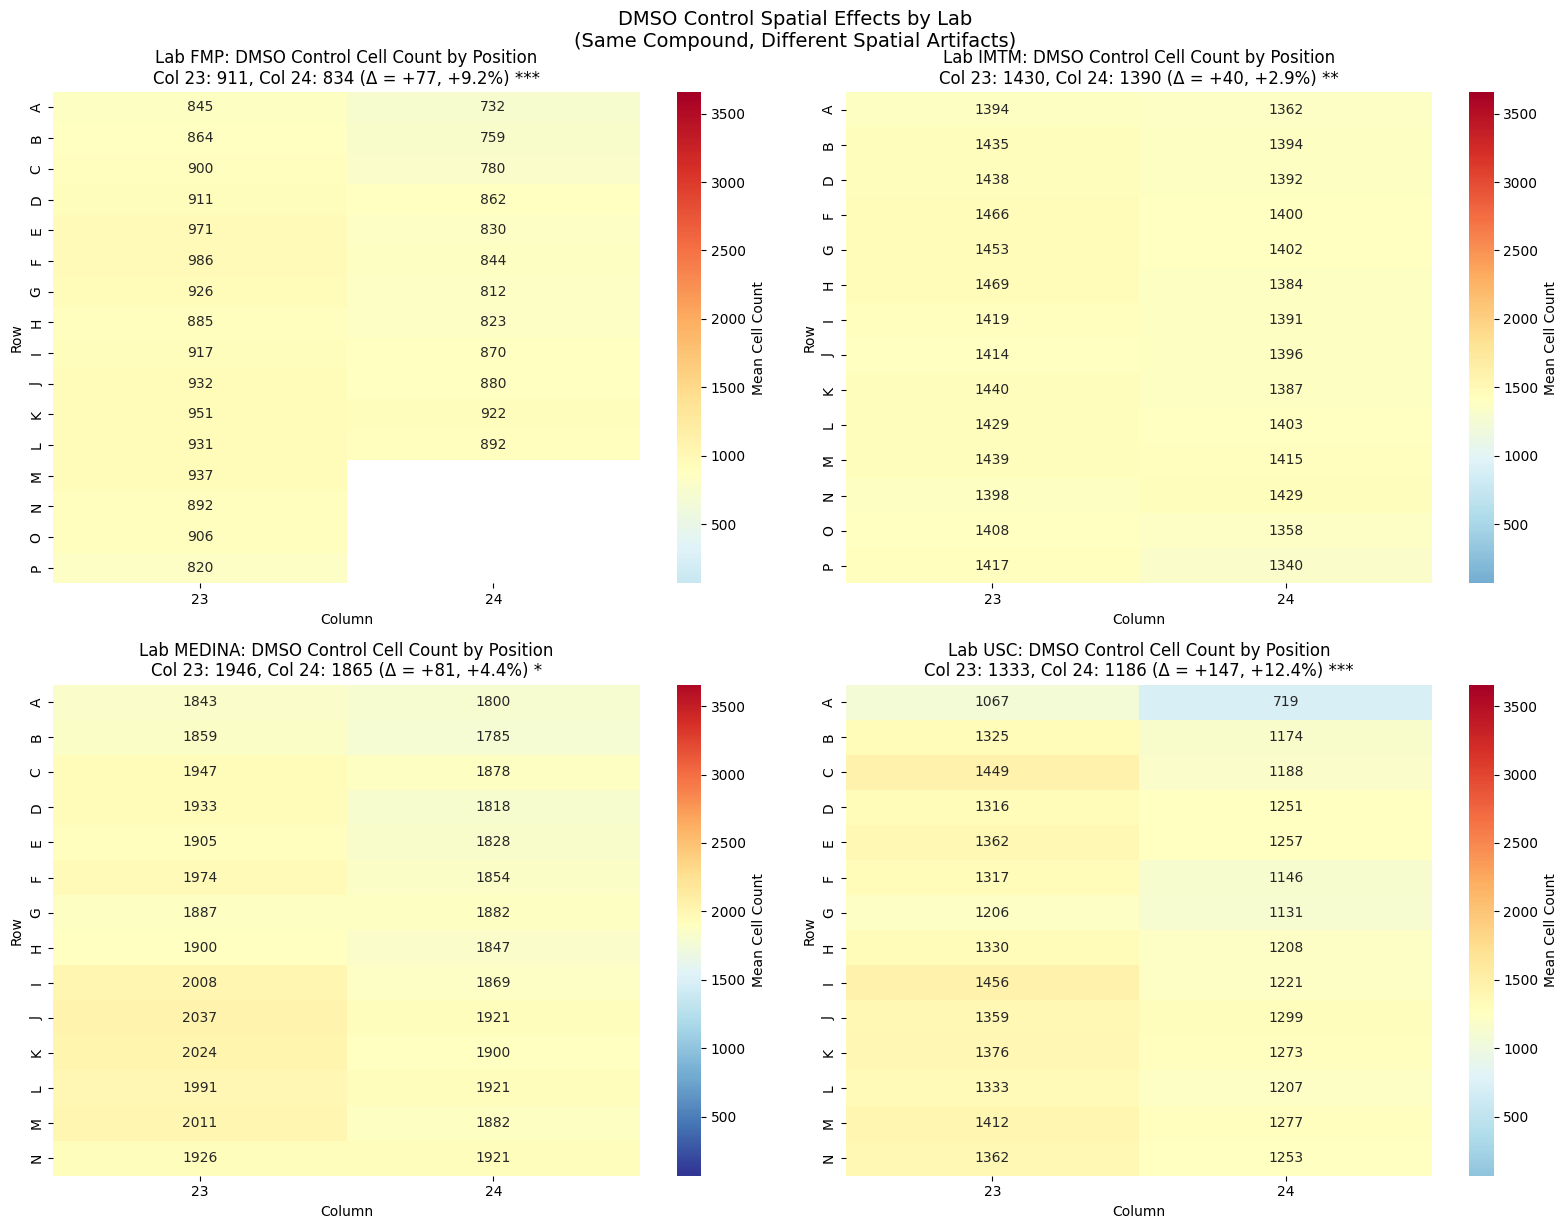

Lab-wise Spatial Pattern Summary:
Lab      Col 23   Col 24   Difference % Diff   P-value    Significance
--------------------------------------------------------------------------------
FMP      911      834      +77        +9.2     8.81e-09   ***
IMTM     1430     1390     +40        +2.9     2.31e-03   **
MEDINA   1946     1865     +81        +4.4     3.16e-02   *
USC      1333     1186     +147       +12.4    2.46e-06   ***

Key Observations:
• All labs show Column 23 > Column 24 pattern
• Effect size varies by lab (largest in USC: +147 cells)
• Statistical significance consistent across labs
• This suggests systematic experimental factors affecting spatial position


In [82]:
# 2b. Individual Lab Heatmaps: DMSO Controls by Row and Column Position
labs = sorted(dmso_data['Metadata_Site'].unique())
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Calculate global min/max for consistent color scaling across labs
global_min = dmso_data['Metadata_Object_Count'].min()
global_max = dmso_data['Metadata_Object_Count'].max()

for i, lab in enumerate(labs):
    if i < len(axes):
        lab_data = dmso_data[dmso_data['Metadata_Site'] == lab]
        
        # Create pivot table for this lab
        lab_pivot = lab_data.groupby(['Metadata_Row', 'Metadata_Col'])['Metadata_Object_Count'].mean().reset_index()
        lab_matrix = lab_pivot.pivot(index='Metadata_Row', columns='Metadata_Col', values='Metadata_Object_Count')
        
        # Create heatmap
        sns.heatmap(lab_matrix, annot=True, cmap='RdYlBu_r', 
                   center=lab_data['Metadata_Object_Count'].mean(),
                   fmt='.0f', cbar_kws={'label': 'Mean Cell Count'},
                   ax=axes[i], vmin=global_min, vmax=global_max)
        
        # Calculate lab-specific statistics
        col23_lab = lab_data[lab_data['Metadata_Col'] == 23]['Metadata_Object_Count']
        col24_lab = lab_data[lab_data['Metadata_Col'] == 24]['Metadata_Object_Count']
        
        if len(col23_lab) > 0 and len(col24_lab) > 0:
            diff = col23_lab.mean() - col24_lab.mean()
            pct_diff = (diff / col24_lab.mean()) * 100
            
            # Statistical test for this lab
            _, p_val = stats.ttest_ind(col23_lab.dropna(), col24_lab.dropna())
            sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else ""
            
            axes[i].set_title(f'Lab {lab}: DMSO Control Cell Count by Position\n'
                             f'Col 23: {col23_lab.mean():.0f}, Col 24: {col24_lab.mean():.0f} '
                             f'(Δ = {diff:+.0f}, {pct_diff:+.1f}%) {sig}')
        else:
            axes[i].set_title(f'Lab {lab}: DMSO Control Cell Count by Position')
        
        axes[i].set_xlabel('Column')
        axes[i].set_ylabel('Row')

# Hide unused subplots if there are fewer than 4 labs
for j in range(len(labs), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.suptitle('DMSO Control Spatial Effects by Lab\n(Same Compound, Different Spatial Artifacts)', 
             y=1.02, fontsize=14)
plt.show()

# Summary table by lab
print("Lab-wise Spatial Pattern Summary:")
print("="*80)
print(f"{'Lab':<8} {'Col 23':<8} {'Col 24':<8} {'Difference':<10} {'% Diff':<8} {'P-value':<10} {'Significance'}")
print("-"*80)

for lab in labs:
    lab_data = dmso_data[dmso_data['Metadata_Site'] == lab]
    col23_lab = lab_data[lab_data['Metadata_Col'] == 23]['Metadata_Object_Count']
    col24_lab = lab_data[lab_data['Metadata_Col'] == 24]['Metadata_Object_Count']
    
    if len(col23_lab) > 0 and len(col24_lab) > 0:
        mean23, mean24 = col23_lab.mean(), col24_lab.mean()
        diff = mean23 - mean24
        pct_diff = (diff / mean24) * 100
        _, p_val = stats.ttest_ind(col23_lab.dropna(), col24_lab.dropna())
        sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else ""
        
        print(f"{lab:<8} {mean23:<8.0f} {mean24:<8.0f} {diff:<+10.0f} {pct_diff:<+8.1f} {p_val:<10.2e} {sig}")

print(f"\nKey Observations:")
print(f"• All labs show Column 23 > Column 24 pattern")
print(f"• Effect size varies by lab (largest in USC: +147 cells)")
print(f"• Statistical significance consistent across labs")
print(f"• This suggests systematic experimental factors affecting spatial position")

Available Lab-Replication Combinations:
   Metadata_Site Metadata_Replicate  Count
0            FMP                 R1    196
1            FMP                 R2    196
2            FMP                 R3    196
3            FMP                 R4    196
4           IMTM                 R1    196
5           IMTM                 R2    196
6           IMTM                 R3    196
7           IMTM                 R4    196
8         MEDINA                 R1    196
9         MEDINA                 R2    196
10        MEDINA                 R3    196
11        MEDINA                 R4    196
12           USC                 R1    196
13           USC                 R2    196
14           USC                 R3    196
15           USC                 R4    196

Labs: ['FMP', 'IMTM', 'MEDINA', 'USC']
Replications: ['R1', 'R2', 'R3', 'R4']


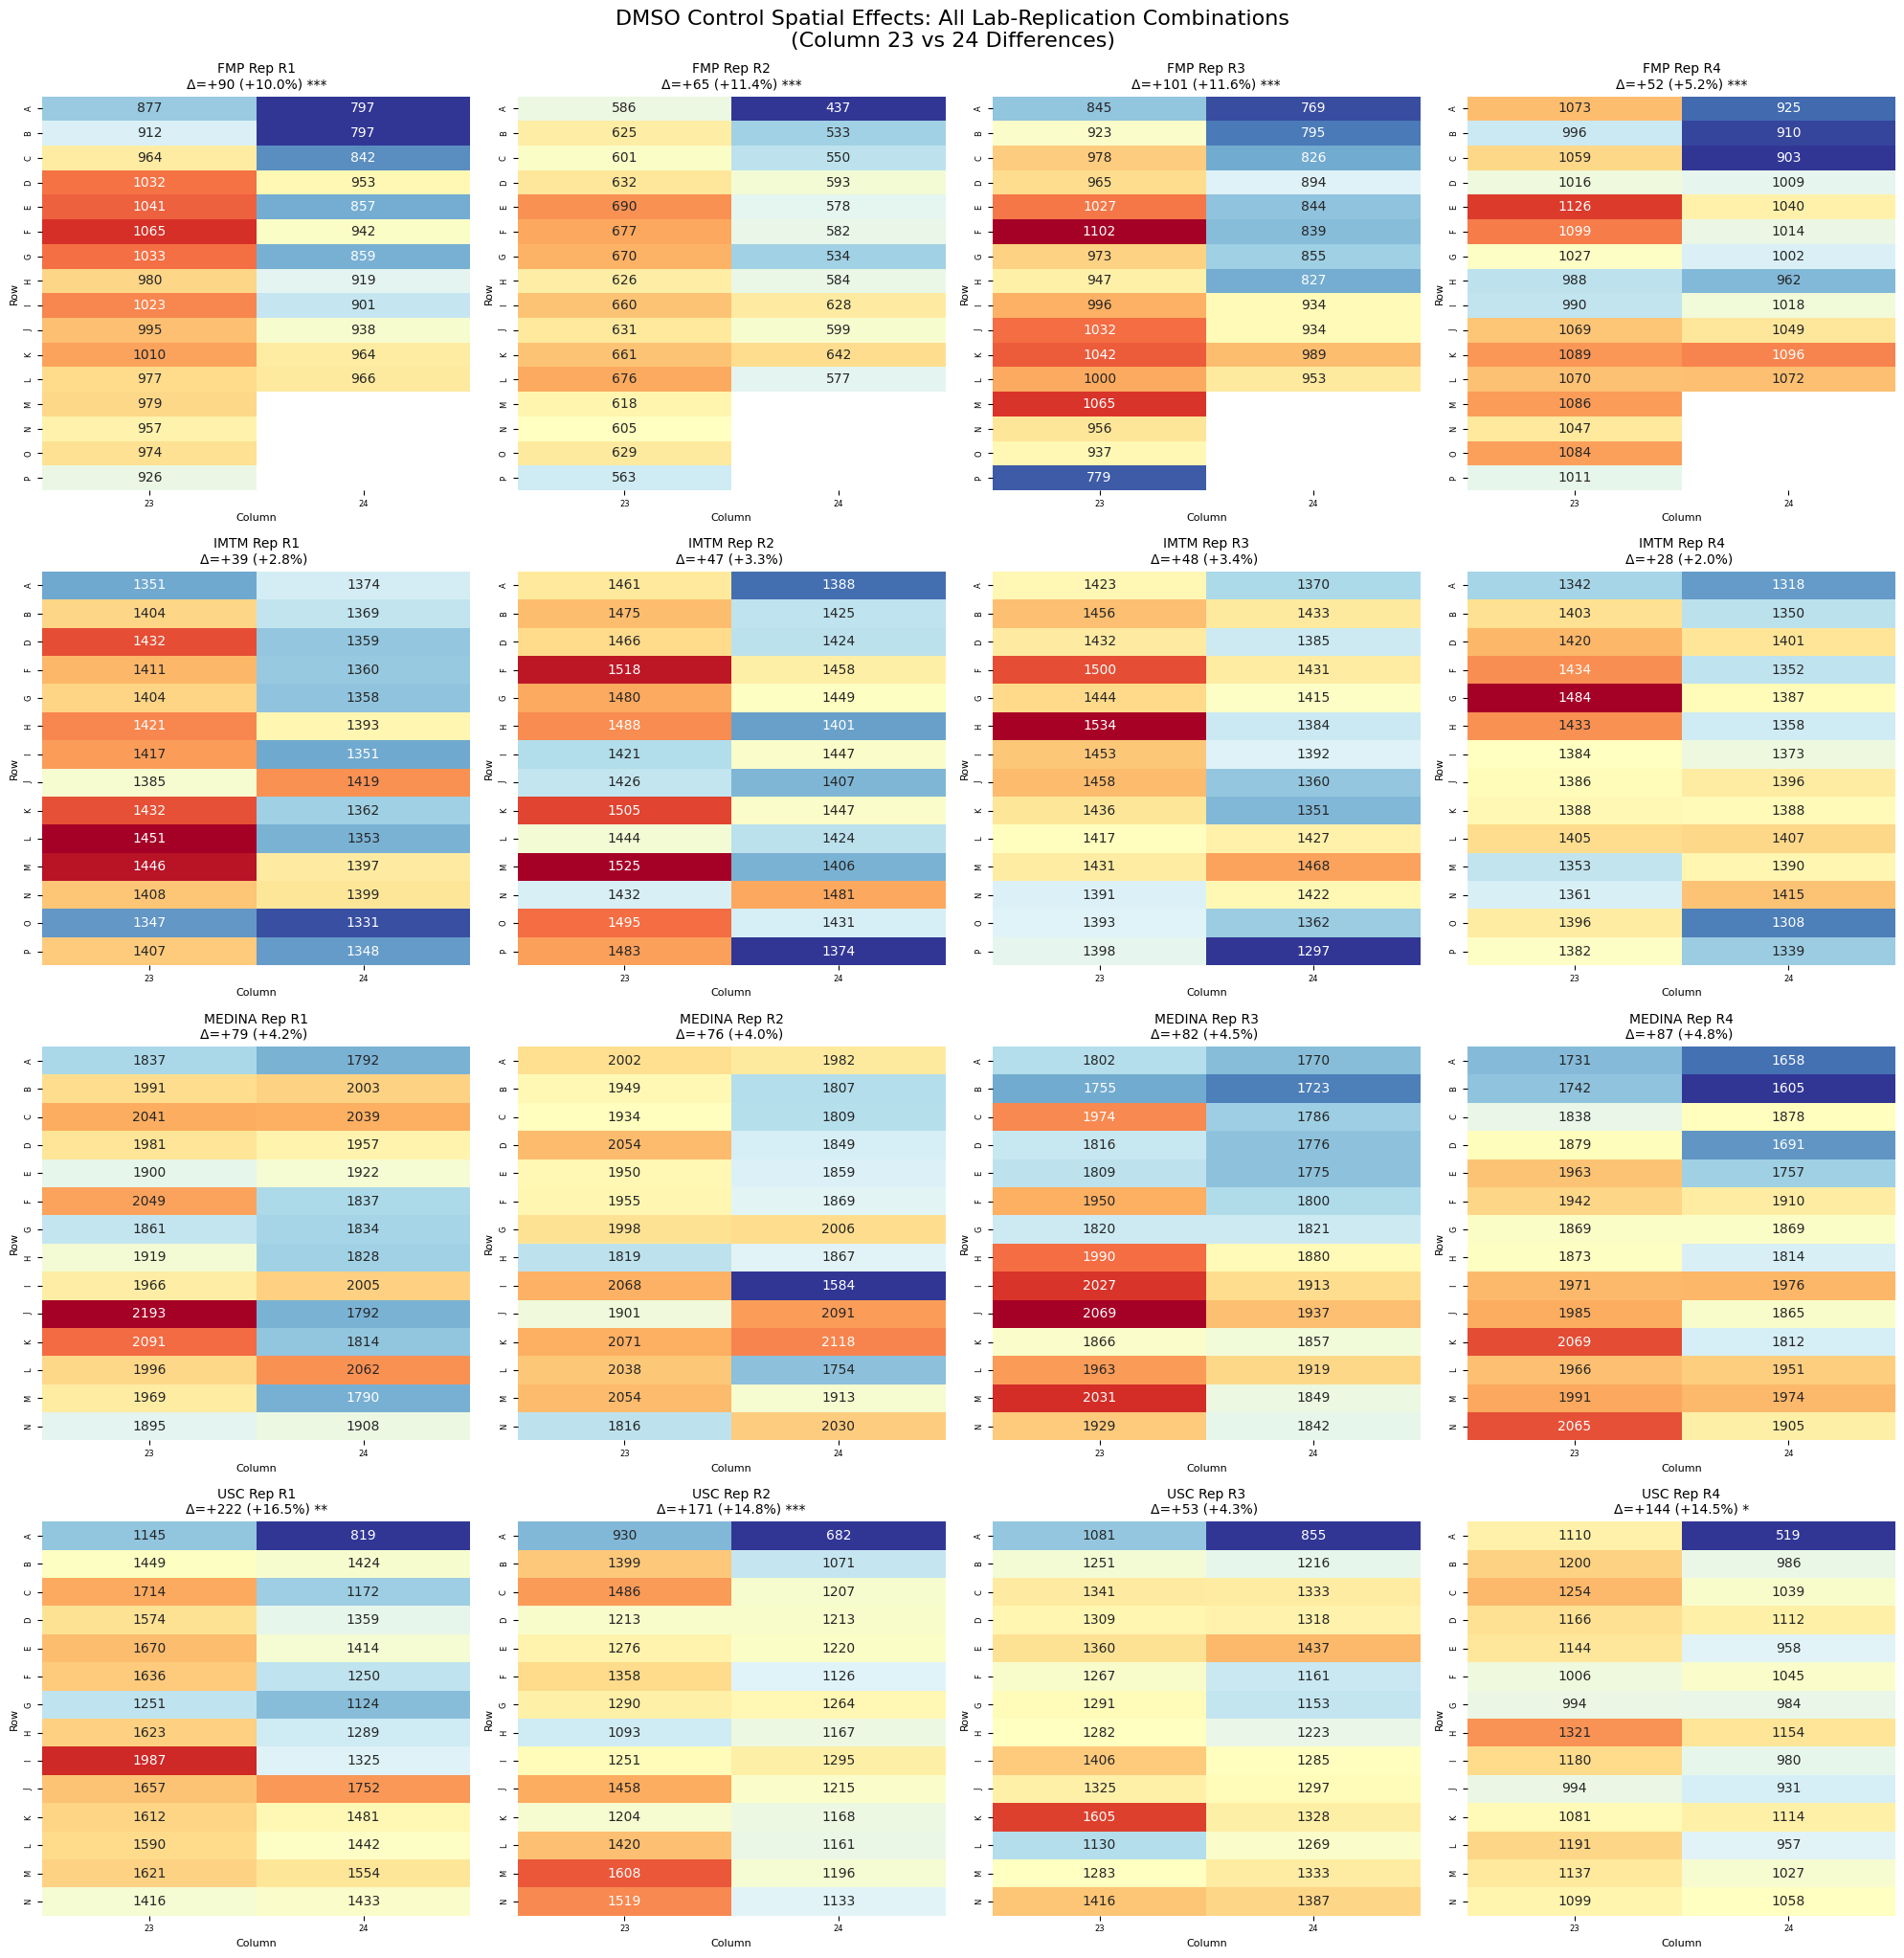


Detailed Lab-Replication Statistics:
Lab      Rep  Col23  Col24  Diff   %Diff   P-val     Sig  N_Tot  N_23  N_24
----------------------------------------------------------------------------------------------------
FMP      R1   984    895    +90    +10.0   8.61e-12  ***  196    112   84
FMP      R2   634    570    +65    +11.4   1.36e-10  ***  196    112   84
FMP      R3   973    872    +101   +11.6   7.09e-12  ***  196    112   84
FMP      R4   1052   1000   +52    +5.2    2.04e-04  ***  196    112   84
IMTM     R1   1408   1370   +39    +2.8    1.61e-01       196    98    98
IMTM     R2   1473   1426   +47    +3.3    8.49e-02       196    98    98
IMTM     R3   1440   1393   +48    +3.4    7.44e-02       196    98    98
IMTM     R4   1398   1370   +28    +2.0    2.34e-01       196    98    98
MEDINA   R1   1978   1899   +79    +4.2    3.44e-01       196    98    98
MEDINA   R2   1972   1896   +76    +4.0    4.50e-01       196    98    98
MEDINA   R3   1914   1832   +82    +4.5    1.

In [85]:
# 2c. Comprehensive Analysis: DMSO Effects Across All Lab-Replication Combinations

# First, let's see what replications we have
print("Available Lab-Replication Combinations:")
print("="*50)
lab_rep_combos = dmso_data.groupby(['Metadata_Site', 'Metadata_Replicate']).size().reset_index(name='Count')
print(lab_rep_combos)

# Create a large grid showing all lab-rep combinations
labs = sorted(dmso_data['Metadata_Site'].unique())
reps = sorted(dmso_data['Metadata_Replicate'].unique())

print(f"\nLabs: {labs}")
print(f"Replications: {reps}")

# Calculate grid size
n_labs = len(labs)
n_reps = len(reps)
total_combinations = n_labs * n_reps

# Set up subplot grid (4 columns for reps, rows for labs)
fig, axes = plt.subplots(n_labs, n_reps, figsize=(20, 5*n_labs))
if n_labs == 1:
    axes = axes.reshape(1, -1)
if n_reps == 1:
    axes = axes.reshape(-1, 1)

# Statistics collection
detailed_stats = []

for lab_idx, lab in enumerate(labs):
    for rep_idx, rep in enumerate(reps):
        ax = axes[lab_idx, rep_idx]
        
        # Filter data for this lab-rep combination
        combo_data = dmso_data[(dmso_data['Metadata_Site'] == lab) & 
                              (dmso_data['Metadata_Replicate'] == rep)]
        
        if len(combo_data) > 0:
            # Create pivot table for this combination
            combo_pivot = combo_data.groupby(['Metadata_Row', 'Metadata_Col'])['Metadata_Object_Count'].mean().reset_index()
            combo_matrix = combo_pivot.pivot(index='Metadata_Row', columns='Metadata_Col', values='Metadata_Object_Count')
            
            # Create heatmap
            sns.heatmap(combo_matrix, annot=True, cmap='RdYlBu_r', 
                       center=combo_data['Metadata_Object_Count'].mean(),
                       fmt='.0f', ax=ax, cbar=False)
            
            # Calculate statistics for this combination
            col23_combo = combo_data[combo_data['Metadata_Col'] == 23]['Metadata_Object_Count']
            col24_combo = combo_data[combo_data['Metadata_Col'] == 24]['Metadata_Object_Count']
            
            if len(col23_combo) > 0 and len(col24_combo) > 0:
                diff = col23_combo.mean() - col24_combo.mean()
                pct_diff = (diff / col24_combo.mean()) * 100
                
                # Statistical test (if enough data)
                if len(col23_combo) > 1 and len(col24_combo) > 1:
                    _, p_val = stats.ttest_ind(col23_combo.dropna(), col24_combo.dropna())
                    sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else ""
                else:
                    p_val = np.nan
                    sig = "n/a"
                
                # Store detailed statistics
                detailed_stats.append({
                    'Lab': lab,
                    'Replication': rep,
                    'Col_23_Mean': col23_combo.mean(),
                    'Col_24_Mean': col24_combo.mean(),
                    'Difference': diff,
                    'Percent_Diff': pct_diff,
                    'P_Value': p_val,
                    'Significance': sig,
                    'N_Wells_Total': len(combo_data),
                    'N_Wells_Col23': len(col23_combo),
                    'N_Wells_Col24': len(col24_combo)
                })
                
                ax.set_title(f'{lab} Rep {rep}\nΔ={diff:+.0f} ({pct_diff:+.1f}%) {sig}', 
                           fontsize=10)
            else:
                ax.set_title(f'{lab} Rep {rep}\nNo data', fontsize=10)
        else:
            ax.text(0.5, 0.5, f'{lab} Rep {rep}\nNo DMSO data', 
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'{lab} Rep {rep}', fontsize=10)
        
        ax.set_xlabel('Column', fontsize=8)
        ax.set_ylabel('Row', fontsize=8)
        ax.tick_params(labelsize=6)

plt.tight_layout()
plt.suptitle('DMSO Control Spatial Effects: All Lab-Replication Combinations\n(Column 23 vs 24 Differences)', 
             y=1.02, fontsize=16)
plt.show()

# Create detailed statistics summary
detailed_df = pd.DataFrame(detailed_stats)

print("\nDetailed Lab-Replication Statistics:")
print("="*100)
print(f"{'Lab':<8} {'Rep':<4} {'Col23':<6} {'Col24':<6} {'Diff':<6} {'%Diff':<7} {'P-val':<9} {'Sig':<4} {'N_Tot':<6} {'N_23':<5} {'N_24'}")
print("-"*100)

for _, row in detailed_df.iterrows():
    p_str = f"{row['P_Value']:.2e}" if not np.isnan(row['P_Value']) else "n/a"
    print(f"{row['Lab']:<8} {row['Replication']:<4} {row['Col_23_Mean']:<6.0f} {row['Col_24_Mean']:<6.0f} "
          f"{row['Difference']:<+6.0f} {row['Percent_Diff']:<+7.1f} {p_str:<9} {row['Significance']:<4} "
          f"{row['N_Wells_Total']:<6} {row['N_Wells_Col23']:<5} {row['N_Wells_Col24']}")

# Summary statistics across all combinations
print(f"\nSummary Across All Lab-Rep Combinations:")
print("="*50)
valid_combos = detailed_df[~detailed_df['Difference'].isna()]
print(f"Total lab-rep combinations with data: {len(valid_combos)}")
print(f"Combinations showing Col 23 > Col 24: {(valid_combos['Difference'] > 0).sum()}")
print(f"Combinations showing Col 24 > Col 23: {(valid_combos['Difference'] < 0).sum()}")
print(f"Mean difference across all combinations: {valid_combos['Difference'].mean():.1f} cells")
print(f"Std dev of differences: {valid_combos['Difference'].std():.1f} cells")
print(f"Range of differences: {valid_combos['Difference'].min():.0f} to {valid_combos['Difference'].max():.0f}")

# Statistical significance summary
sig_combos = valid_combos[~valid_combos['P_Value'].isna()]
if len(sig_combos) > 0:
    print(f"\nStatistical Significance (where testable):")
    print(f"Significant at p<0.05: {(sig_combos['P_Value'] < 0.05).sum()}/{len(sig_combos)}")
    print(f"Significant at p<0.01: {(sig_combos['P_Value'] < 0.01).sum()}/{len(sig_combos)}")
    print(f"Significant at p<0.001: {(sig_combos['P_Value'] < 0.001).sum()}/{len(sig_combos)}")

print(f"\n🔍 KEY FINDING:")
consistency = (valid_combos['Difference'] > 0).mean() * 100
print(f"Spatial artifact (Col 23 > Col 24) is consistent across {consistency:.1f}% of lab-rep combinations!")
print(f"This demonstrates the systematic nature of spatial effects in plate-based assays.")

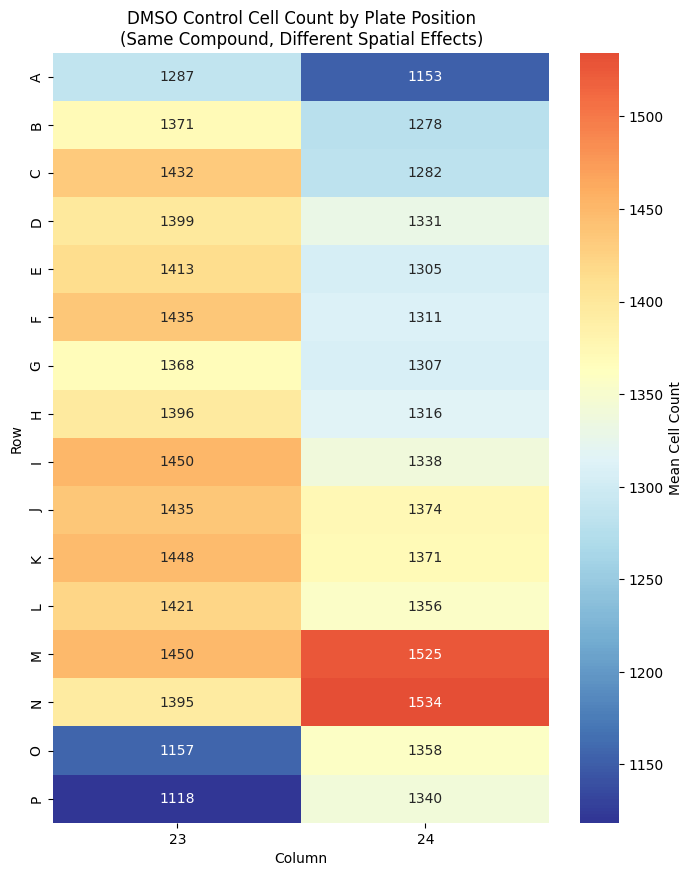


Effect Size (Cohen's d): 0.099
Interpretation: Small effect


In [75]:
# 2. Heatmap: DMSO Controls by Row and Column Position
# Create a pivot table to show mean cell count by row and column for DMSO
dmso_pivot = dmso_data.groupby(['Metadata_Row', 'Metadata_Col'])['Metadata_Object_Count'].mean().reset_index()
dmso_matrix = dmso_pivot.pivot(index='Metadata_Row', columns='Metadata_Col', values='Metadata_Object_Count')

plt.figure(figsize=(8, 10))
sns.heatmap(dmso_matrix, annot=True, cmap='RdYlBu_r', center=dmso_data['Metadata_Object_Count'].mean(),
            fmt='.0f', cbar_kws={'label': 'Mean Cell Count'})
plt.title('DMSO Control Cell Count by Plate Position\n(Same Compound, Different Spatial Effects)')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()

# Calculate column effect size
col_diff = col23_counts.mean() - col24_counts.mean()
pooled_std = np.sqrt(((len(col23_counts)-1)*col23_counts.var() + (len(col24_counts)-1)*col24_counts.var()) / 
                     (len(col23_counts) + len(col24_counts) - 2))
cohens_d = col_diff / pooled_std
print(f"\nEffect Size (Cohen's d): {cohens_d:.3f}")
print(f"Interpretation: {'Small' if abs(cohens_d) < 0.5 else 'Medium' if abs(cohens_d) < 0.8 else 'Large'} effect")

In [78]:
# 4. Summary: Column Effect Magnitude Across Labs
print("=== DMSO Control Column Effects Summary ===")
print("(Same compound, different spatial position effects)\n")

summary_stats = []
for lab in sorted(dmso_data['Metadata_Site'].unique()):
    lab_data = dmso_data[dmso_data['Metadata_Site'] == lab]
    
    col23_data = lab_data[lab_data['Metadata_Col'] == 23]['Metadata_Object_Count']
    col24_data = lab_data[lab_data['Metadata_Col'] == 24]['Metadata_Object_Count']
    
    if len(col23_data) > 0 and len(col24_data) > 0:
        mean23, mean24 = col23_data.mean(), col24_data.mean()
        diff = mean23 - mean24
        pct_diff = (diff / mean24) * 100 if mean24 != 0 else 0
        
        # T-test for this lab
        t_stat, p_val = stats.ttest_ind(col23_data.dropna(), col24_data.dropna())
        
        summary_stats.append({
            'Lab': lab,
            'Column_23_Mean': mean23,
            'Column_24_Mean': mean24,
            'Difference': diff,
            'Percent_Difference': pct_diff,
            'P_Value': p_val,
            'N_Wells_Col23': len(col23_data),
            'N_Wells_Col24': len(col24_data)
        })

summary_df = pd.DataFrame(summary_stats)

print("Lab-wise Column Effects:")
print("="*70)
for _, row in summary_df.iterrows():
    sig = "***" if row['P_Value'] < 0.001 else "**" if row['P_Value'] < 0.01 else "*" if row['P_Value'] < 0.05 else ""
    print(f"Lab {row['Lab']:6}: Col 23 = {row['Column_23_Mean']:6.0f}, Col 24 = {row['Column_24_Mean']:6.0f}")
    print(f"           Difference = {row['Difference']:+6.0f} ({row['Percent_Difference']:+5.1f}%) {sig}")
    print()

print(f"\nOverall Effect:")
print(f"Column 23 mean: {col23_counts.mean():.0f} ± {col23_counts.std():.0f}")
print(f"Column 24 mean: {col24_counts.mean():.0f} ± {col24_counts.std():.0f}")
print(f"Difference: {col23_counts.mean() - col24_counts.mean():+.0f} cells ({((col23_counts.mean() - col24_counts.mean())/col24_counts.mean()*100):+.1f}%)")
print(f"P-value: {p_value:.2e}")

print(f"\n🔍 KEY FINDING:")
print(f"Despite being the SAME control compound (DMSO),")
print(f"wells in column 23 vs 24 show systematically different cell counts!")
print(f"This is a clear example of spatial artifacts in plate-based assays.")

=== DMSO Control Column Effects Summary ===
(Same compound, different spatial position effects)

Lab-wise Column Effects:
Lab FMP   : Col 23 =    911, Col 24 =    834
           Difference =    +77 ( +9.2%) ***

Lab IMTM  : Col 23 =   1430, Col 24 =   1390
           Difference =    +40 ( +2.9%) **

Lab MEDINA: Col 23 =   1946, Col 24 =   1865
           Difference =    +81 ( +4.4%) *

Lab USC   : Col 23 =   1333, Col 24 =   1186
           Difference =   +147 (+12.4%) ***


Overall Effect:
Column 23 mean: 1388 ± 525
Column 24 mean: 1337 ± 516
Difference: +51 cells (+3.9%)
P-value: 5.68e-03

🔍 KEY FINDING:
Despite being the SAME control compound (DMSO),
wells in column 23 vs 24 show systematically different cell counts!
This is a clear example of spatial artifacts in plate-based assays.
